# Exploratory Data Analysis

---

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## 2. Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python

In [3]:
client_df = pd.read_csv('clean_data_after_eda.csv')
price_df = pd.read_csv('price_data.csv')

Let's look at the rows of both dataframes to see what the data looks like

In [4]:
client_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   
3                   0.000003           0.000000e+00   
4                   0.000011           2.896760e-06   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0               9.084737e-04                   2.086294   
1               0.000000e+00                   0.009482   
2               0.000000e+00                   0.000000   
3               0.000000e+00                   0.000000   
4               4.860000e-10                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix var_6m_price_off_peak  \
0              99.530517                  44.235794              2.086425   
1               0.000000                   0.000000              0.009485   
2               0.000000                   0.000000              0.000004   
3               0.000000                   0.000000              0.000003   
4               0.000000                   0.000000              0.000011   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0       9.953056e+01           4.423670e+01      1  
1       1.217891e-03           0.000000e+00      0  
2       9.450150e-08           0.000000e+00      0  
3       0.000000e+00           0.000000e+00      0  
4       2.896760e-06           4.860000e-10      0  

[5 rows x 44 columns]

With the client data, we have a mix of numeric and categorical data, which we will need to transform before modelling later

In [5]:
price_df.head()

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

Let look for any Null values in dataframe

In [6]:
client_df.isnull().any()

id                                False
channel_sales                     False
cons_12m                          False
cons_gas_12m                      False
cons_last_month                   False
date_activ                        False
date_end                          False
date_modif_prod                   False
date_renewal                      False
forecast_cons_12m                 False
forecast_cons_year                False
forecast_discount_energy          False
forecast_meter_rent_12m           False
forecast_price_energy_off_peak    False
forecast_price_energy_peak        False
forecast_price_pow_off_peak       False
has_gas                           False
imp_cons                          False
margin_gross_pow_ele              False
margin_net_pow_ele                False
nb_prod_act                       False
net_margin                        False
num_years_antig                   False
origin_up                         False
pow_max                           False


In [7]:
price_df.isnull().any()

id                    False
price_date            False
price_off_peak_var    False
price_peak_var        False
price_mid_peak_var    False
price_off_peak_fix    False
price_peak_fix        False
price_mid_peak_fix    False
dtype: bool

With the price data, it is purely numeric data but we can see a lot of zeros

---

## 3. Descriptive statistics of data

### Data types


In [8]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [9]:
date_columns = ["date_activ", "date_end", "date_modif_prod", "date_renewal"]
client_df[date_columns] = client_df[date_columns].apply(pd.to_datetime, format='%Y-%m-%d')


In [10]:
client_df.dtypes

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

In [11]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [12]:
price_df["price_date"] = price_df["price_date"].apply(pd.to_datetime, format='%Y-%m-%d')

In [13]:
price_df.dtypes

id                            object
price_date            datetime64[ns]
price_off_peak_var           float64
price_peak_var               float64
price_mid_peak_var           float64
price_off_peak_fix           float64
price_peak_fix               float64
price_mid_peak_fix           float64
dtype: object

You can see that all of the `datetime` related columns are not currently in datetime format. We will need to convert these later.

### Statistics

Now let's look at some statistics about the datasets

In [14]:
client_df.describe()

cons_12m  cons_gas_12m  cons_last_month  \
count  1.460600e+04  1.460600e+04     14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752   
min    0.000000e+00  0.000000e+00         0.000000   
25%    5.674750e+03  0.000000e+00         0.000000   
50%    1.411550e+04  0.000000e+00       792.500000   
75%    4.076375e+04  0.000000e+00      3383.000000   
max    6.207104e+06  4.154590e+06    771203.000000   
std    5.734653e+05  1.629731e+05     64364.196422   

                          date_activ                       date_end  \
count                          14606                          14606   
mean   2011-01-28 07:54:18.879912448  2016-07-27 20:48:26.422018560   
min              2003-05-09 00:00:00            2016-01-28 00:00:00   
25%              2010-01-15 00:00:00            2016-04-27 06:00:00   
50%              2011-03-04 00:00:00            2016-08-01 00:00:00   
75%              2012-04-19 00:00:00            2016-10-31 00:00:00   
max              2014-09-01 00:00:00            2017-06-13 00:00:00   
std                              NaN                            NaN   

                     date_modif_prod                   date_renewal  \
count                          14606                          14606   
mean   2013-01-02 12:29:10.951663872  2015-07-21 06:59:00.353279488   
min              2003-05-09 00:00:00            2013-06-26 00:00:00   
25%              2010-08-12 00:00:00            2015-04-17 00:00:00   
50%              2013-06-19 00:00:00            2015-07-27 00:00:00   
75%              2015-06-16 00:00:00            2015-10-29 00:00:00   
max              2016-01-29 00:00:00            2016-01-28 00:00:00   
std                              NaN                            NaN   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  ...  \
count       14606.000000        14606.000000              14606.000000  ...   
mean         1868.614880         1399.762906                  0.966726  ...   
min             0.000000            0.000000                  0.000000  ...   
25%           494.995000            0.000000                  0.000000  ...   
50%          1112.875000          314.000000                  0.000000  ...   
75%          2401.790000         1745.750000                  0.000000  ...   
max         82902.830000       175375.000000                 30.000000  ...   
std          2387.571531         3247.786255                  5.108289  ...   

       var_6m_price_off_peak_var  var_6m_price_peak_var  \
count               14606.000000           1.460600e+04   
mean                    0.000025           3.304264e-05   
min                     0.000000           0.000000e+00   
25%                     0.000003           0.000000e+00   
50%                     0.000004           9.450150e-08   
75%                     0.000011           2.896760e-06   
max                     0.005543           4.791197e-03   
std                     0.000204           2.231791e-04   

       var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
count               1.460600e+04               14606.000000   
mean                1.406015e-05                   0.922810   
min                 0.000000e+00                   0.000000   
25%                 0.000000e+00                   0.000000   
50%                 0.000000e+00                   0.000000   
75%                 4.860000e-10                   0.007962   
max                 2.415288e-03                 525.988881   
std                 1.273170e-04                  18.218286   

       var_6m_price_peak_fix  var_6m_price_mid_peak_fix  \
count           14606.000000               14606.000000   
mean                1.460247                   0.634413   
min                 0.000000                   0.000000   
25%                 0.000000                   0.000000   
50%                 0.000000                   0.000000   
75%                 0.000000                   0.000000   
max               3

The describe method gives us a lot of information about the client data. The key point to take away from this is that we have highly skewed data, as exhibited by the percentile values by looking at min,max and mean values

In [15]:
price_df.describe()

price_date  price_off_peak_var  price_peak_var  \
count                         193002       193002.000000   193002.000000   
mean   2015-06-16 12:50:49.933161216            0.141027        0.054630   
min              2015-01-01 00:00:00            0.000000        0.000000   
25%              2015-04-01 00:00:00            0.125976        0.000000   
50%              2015-07-01 00:00:00            0.146033        0.085483   
75%              2015-10-01 00:00:00            0.151635        0.101673   
max              2015-12-01 00:00:00            0.280700        0.229788   
std                              NaN            0.025032        0.049924   

       price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
count       193002.000000       193002.000000   193002.000000   
mean             0.030496           43.334477       10.622875   
min              0.000000            0.000000        0.000000   
25%              0.000000           40.728885        0.000000   
50%              0.000000           44.266930        0.000000   
75%              0.072558           44.444710       24.339581   
max              0.114102           59.444710       36.490692   
std              0.036298            5.410297       12.841895   

       price_mid_peak_fix  
count       193002.000000  
mean             6.409984  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%             16.226389  
max             17.458221  
std              7.773592

Overall the price data looks good.

---

## 3. Data visualization

Now let's dive a bit deeper into the dataframes

In [16]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

### Churn

In [17]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

In [18]:
churn_percentage.transpose()

churn              0         1
Companies  90.284814  9.715186

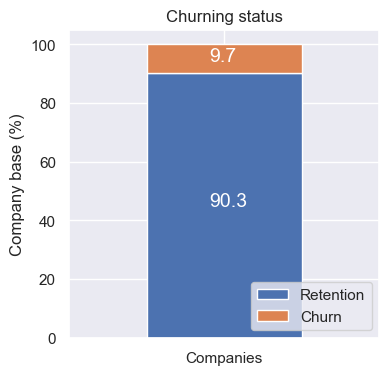

In [19]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (4, 4), legend_="lower right")

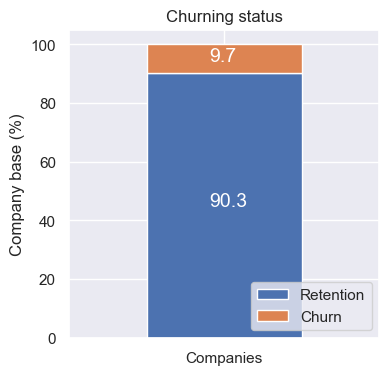

In [20]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (4, 4), legend_="lower right")

About 10% of the total customers have churned. (This sounds about right)

### Sales channel

In [21]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [22]:
channel

churn                                  0      1
channel_sales                                  
MISSING                           3442.0  283.0
epumfxlbckeskwekxbiuasklxalciiuu     3.0    0.0
ewpakwlliwisiwduibdlfmalxowmwpci   818.0   75.0
fixdbufsefwooaasfcxdxadsiekoceaa     2.0    0.0
foosdfpfkusacimwkcsosbicdxkicaua  5934.0  820.0
lmkebamcaaclubfxadlmueccxoimlema  1740.0  103.0
sddiedcslfslkckwlfkdpoeeailfpeds    11.0    0.0
usilxuppasemubllopkaafesmlibmsdf  1237.0  138.0

In [23]:
channel_churn

churn                                      0          1
channel_sales                                          
foosdfpfkusacimwkcsosbicdxkicaua   87.859046  12.140954
usilxuppasemubllopkaafesmlibmsdf   89.963636  10.036364
ewpakwlliwisiwduibdlfmalxowmwpci   91.601344   8.398656
MISSING                            92.402685   7.597315
lmkebamcaaclubfxadlmueccxoimlema   94.411286   5.588714
epumfxlbckeskwekxbiuasklxalciiuu  100.000000   0.000000
fixdbufsefwooaasfcxdxadsiekoceaa  100.000000   0.000000
sddiedcslfslkckwlfkdpoeeailfpeds  100.000000   0.000000

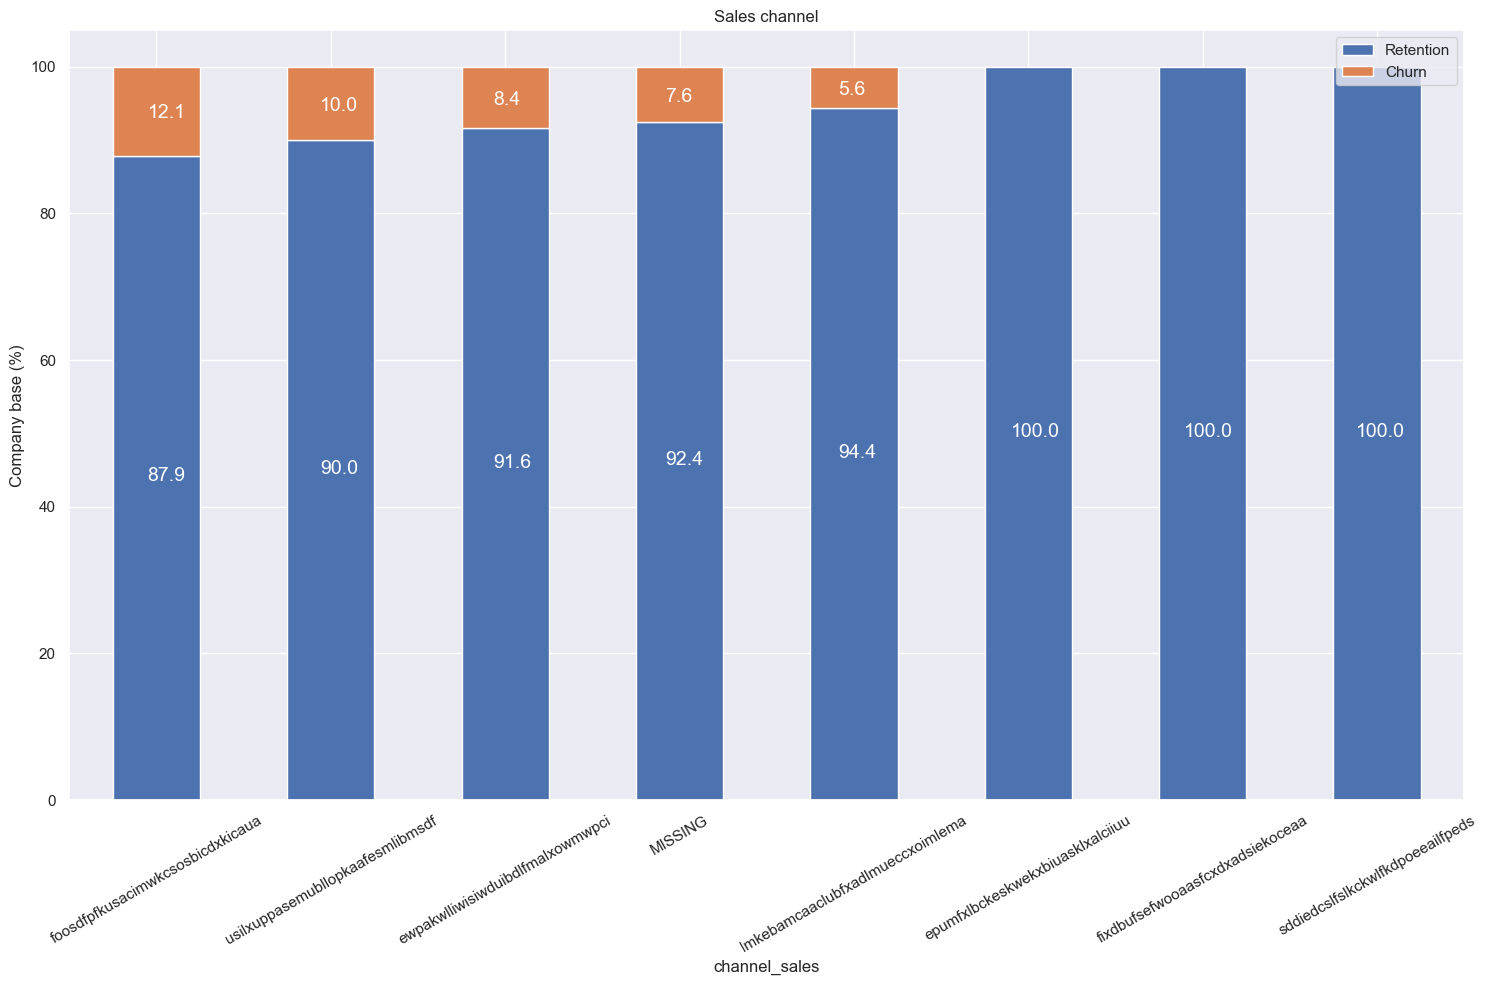

In [24]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

Interestingly, the churning customers are distributed over 5 different values for `channel_sales`. As well as this, the value of `MISSING` has a churn rate of 7.6%. `MISSING` indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

### Consumption

Let's see the distribution of the consumption in the last year and month. Since the consumption data is univariate, let's use histograms to visualize their distribution.

In [25]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [26]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

cons_12m


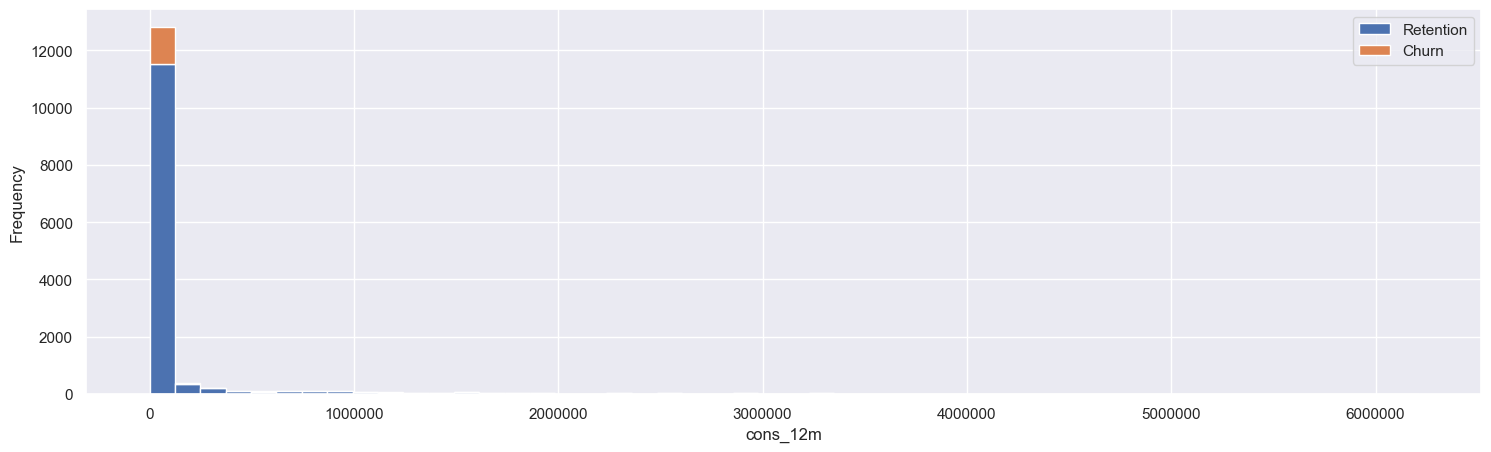

cons_gas_12m


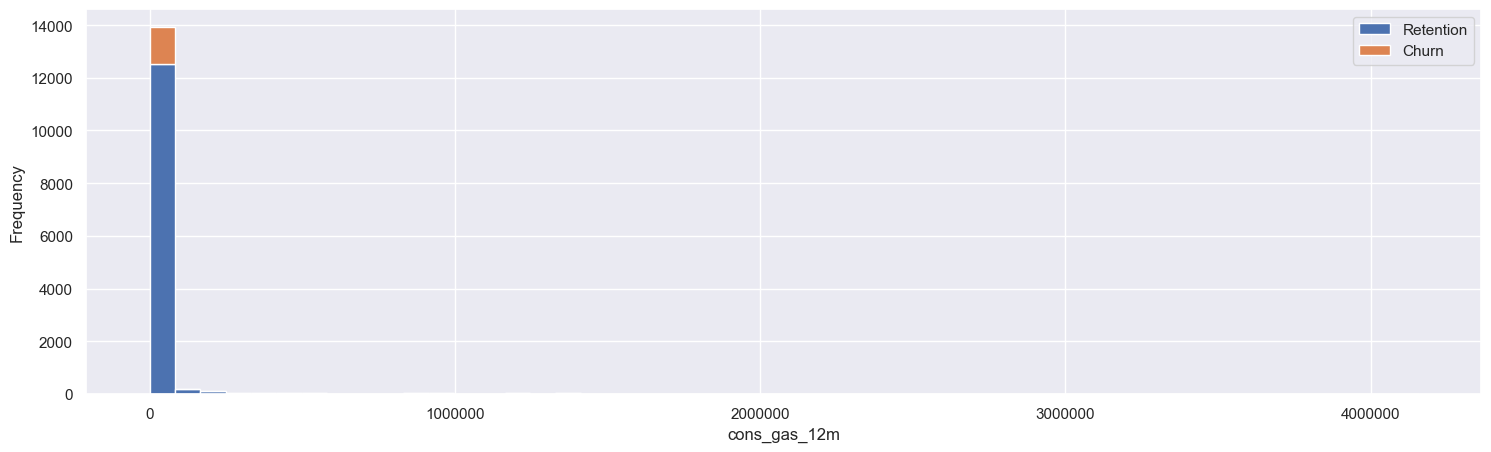

cons_last_month


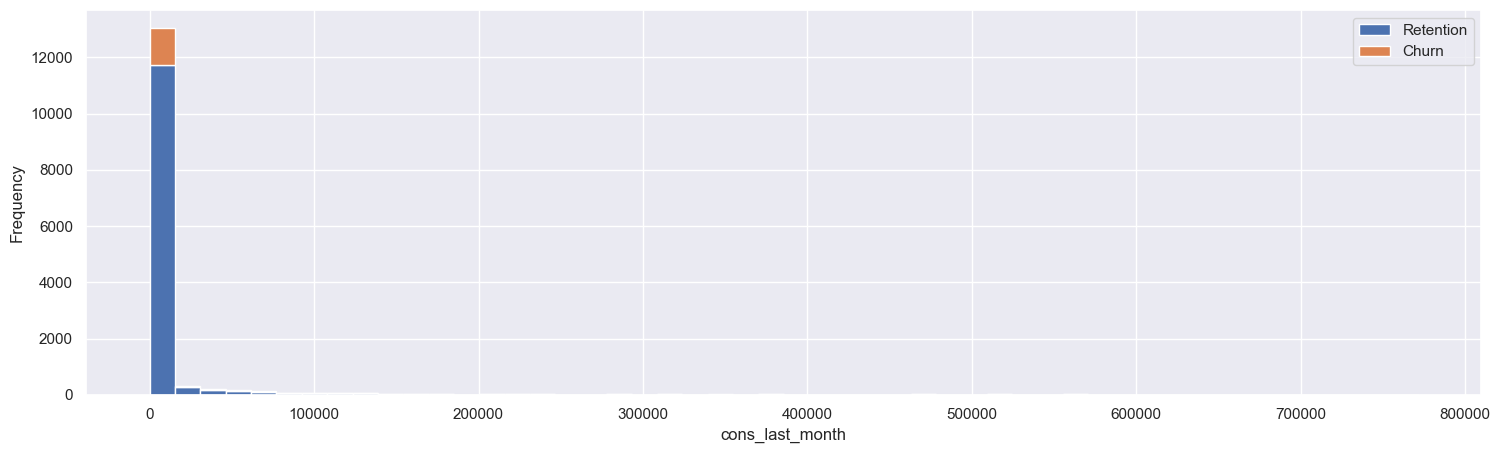

imp_cons


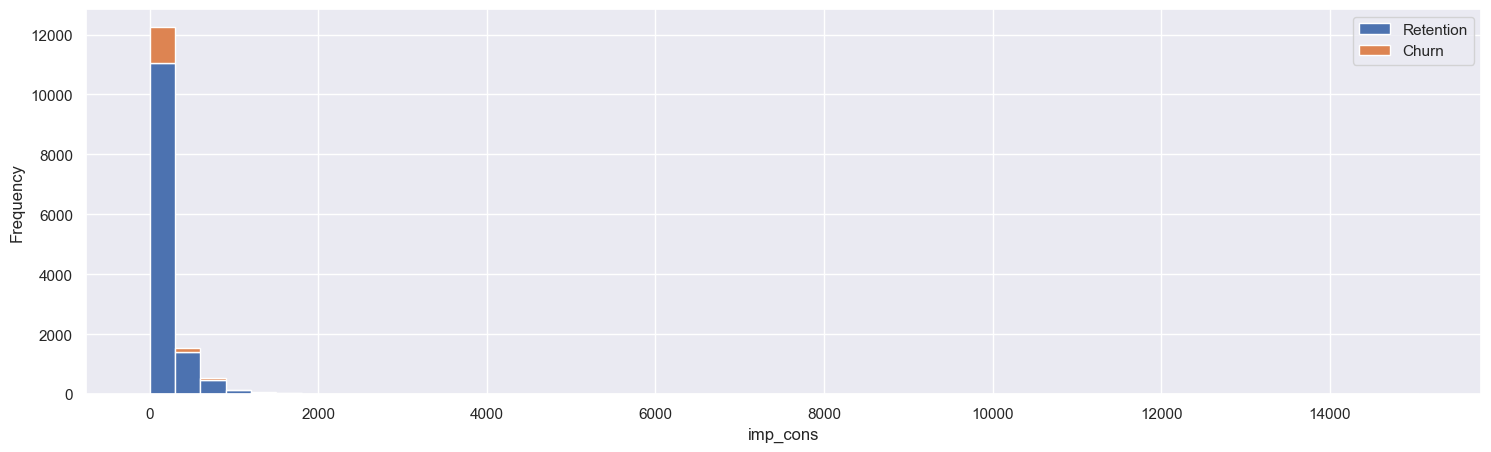

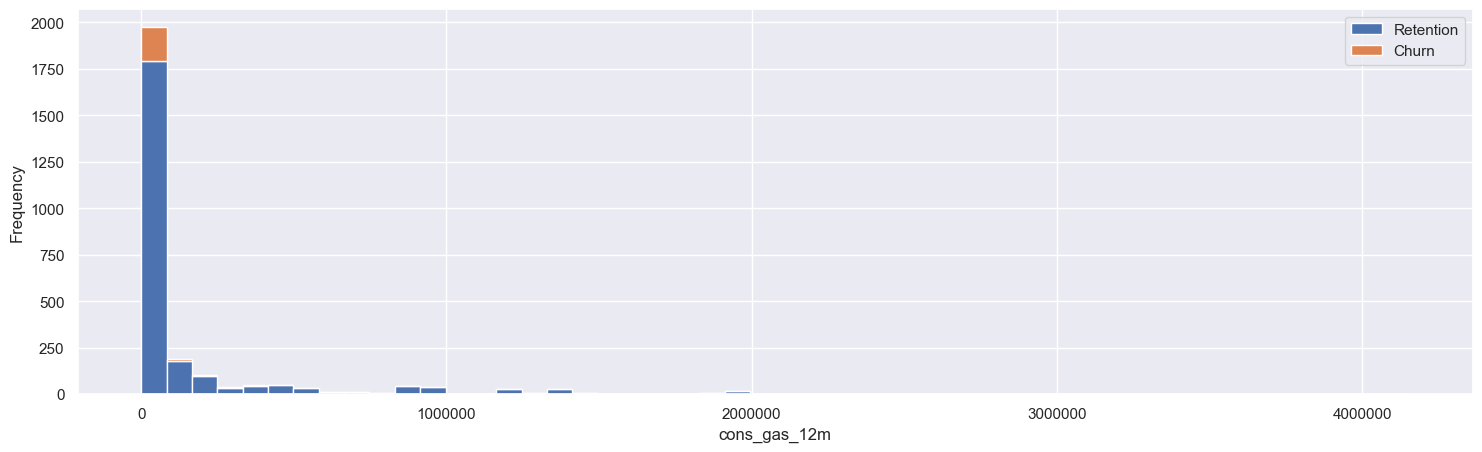

In [27]:
# fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

# plot_distribution(consumption, 'cons_12m', axs[0])
# plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
# plot_distribution(consumption, 'cons_last_month', axs[2])
# plot_distribution(consumption, 'imp_cons', axs[3])

for column in consumption.columns:
    if consumption[column].dtype != object and column != 'churn':
        print(column)
        fig, axs = plt.subplots(nrows=1, figsize=(18, 5))
        plot_distribution(client_df, column, axs)
        plt.show()

# since 'has_gas' column is categorical
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m',axs)
plt.show()

Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution based on a five number summary:
- Minimum
- First quartile (Q1)
- Median
- Third quartile (Q3)
- Maximum

It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

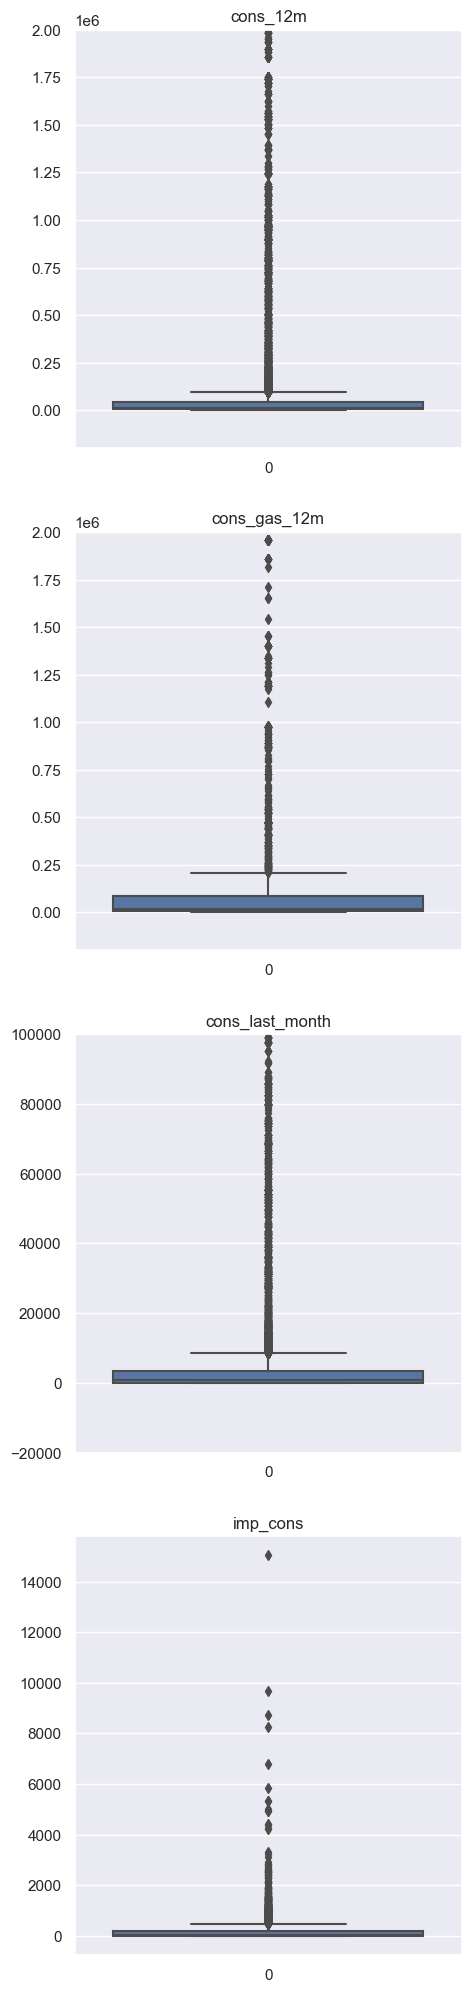

In [28]:
fig, axs = plt.subplots(nrows=4, figsize=(5,25))

# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])

# # Remove scientific notation
# for ax in axs:
#     ax.ticklabel_format(style='plain', axis='x')
 # Set x-axis limit
axs[0].set_ylim(-200000, 2000000)
axs[0].set_title('cons_12m')
axs[1].set_ylim(-200000, 2000000)
axs[1].set_title('cons_gas_12m')
axs[2].set_ylim(-20000, 100000)
axs[2].set_title('cons_last_month')
axs[3].set_title('imp_cons')
plt.show()


##### We will deal with skewness and outliers during feature engineering in the next exercise.

### Forecast

In [29]:
forecast = client_df[
    ["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"
    ]
]

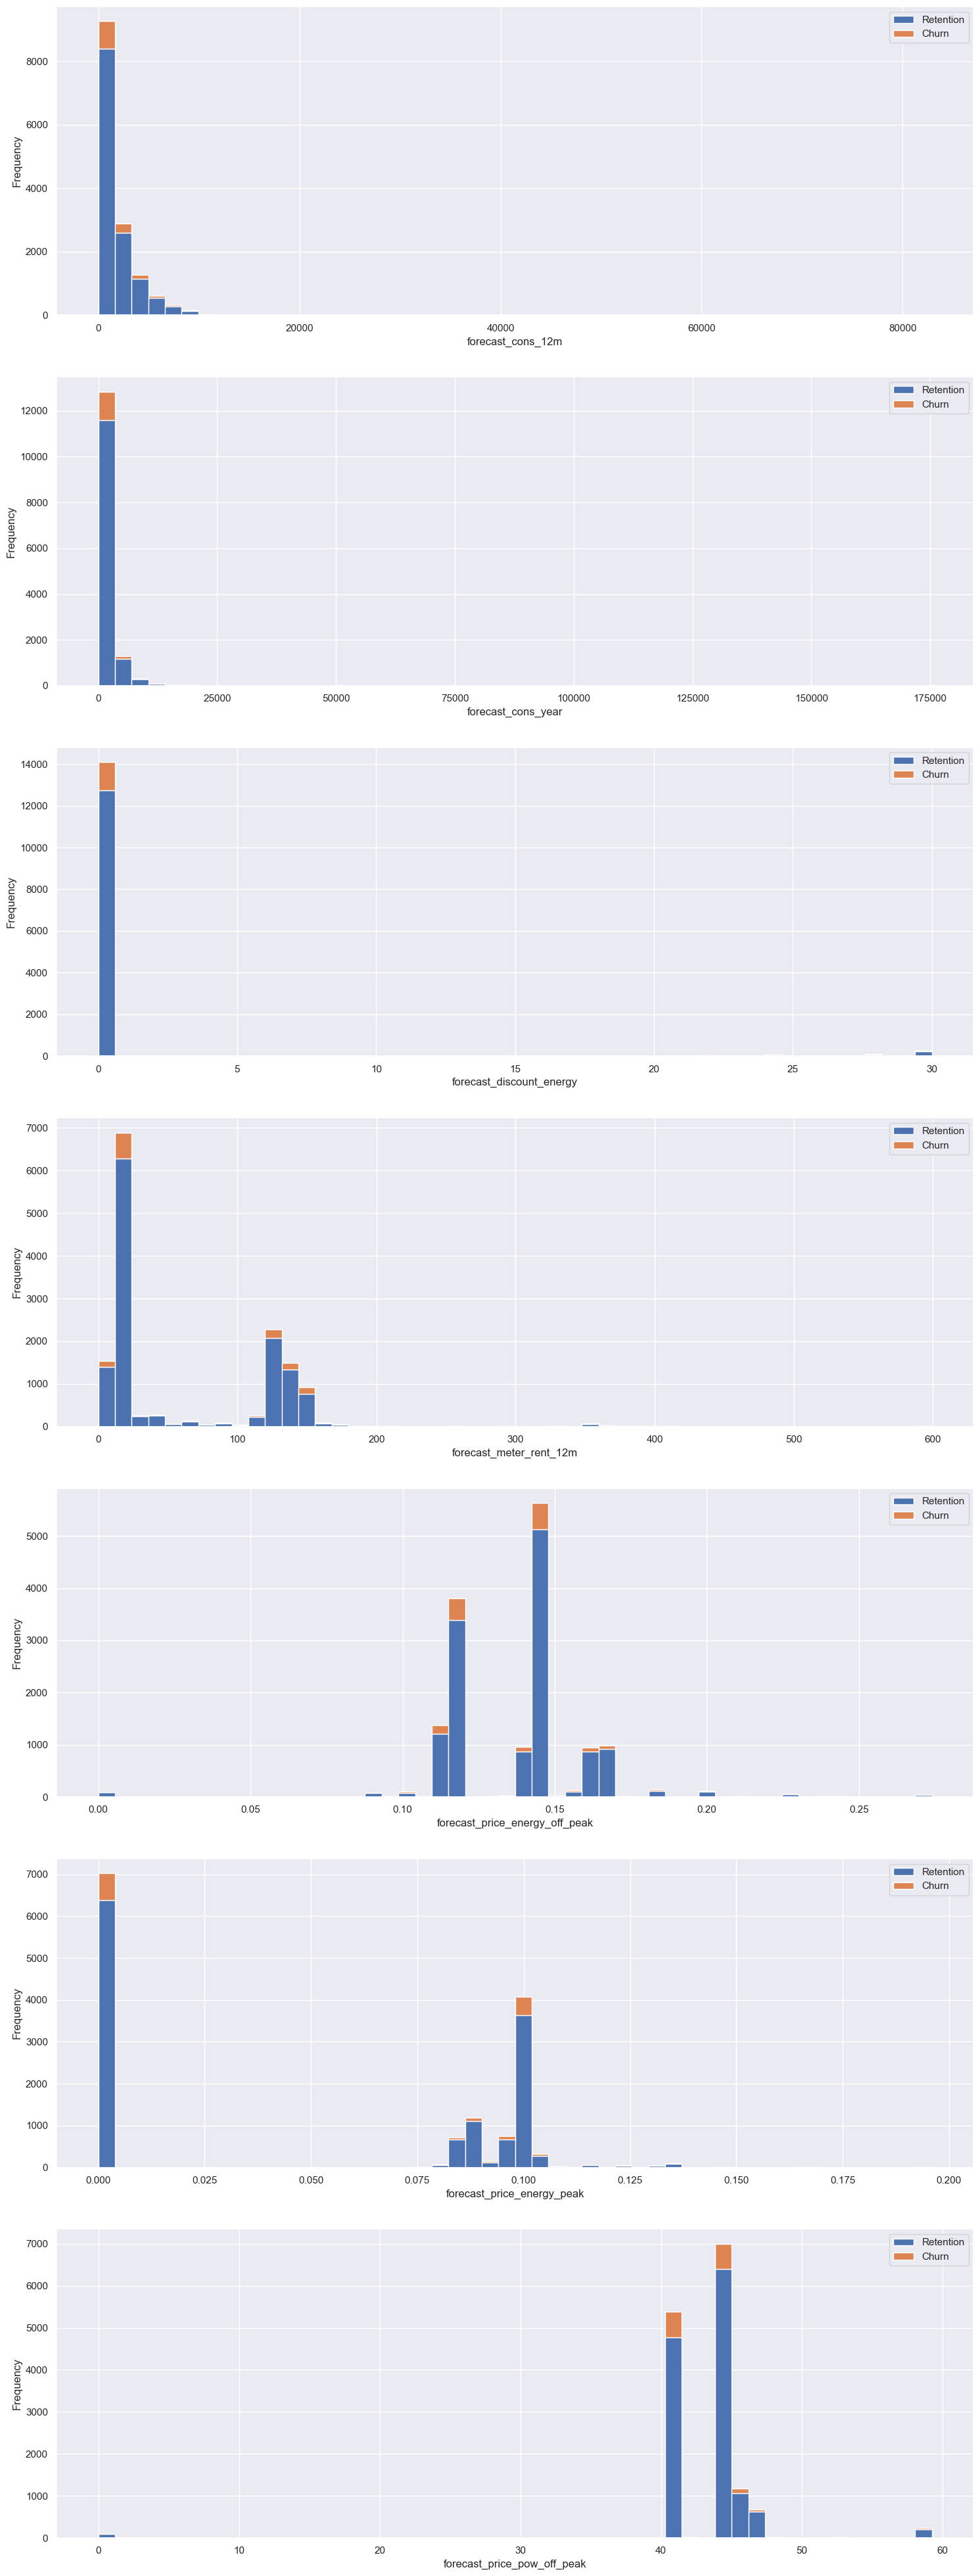

In [30]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])



Similarly to the consumption plots, we can observe that a lot of the variables are highly positively skewed, creating a very long tail for the higher values. We will make some transformations during the next exercise to correct for this skewness.

### Contract type

In [31]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

In [32]:
contract

churn        0     1
has_gas             
f        10753  1202
t         2434   217

In [33]:
contract_percentage

churn            0          1
has_gas                      
f        89.945629  10.054371
t        91.814410   8.185590

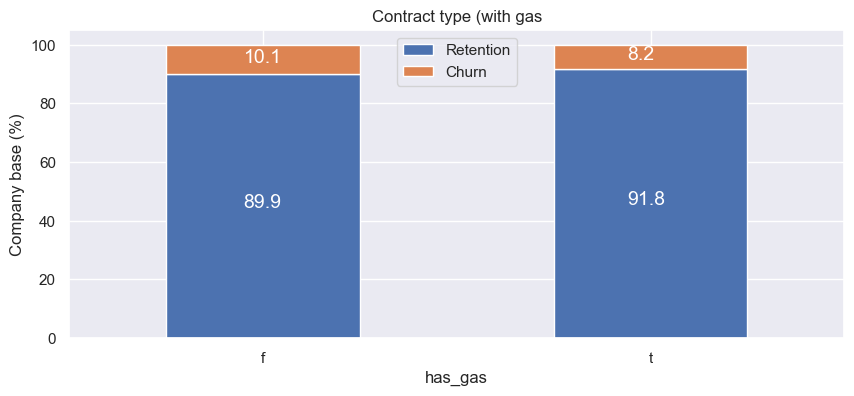

In [34]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas',(10,4), legend_='upper center' )

### Margins

In [35]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

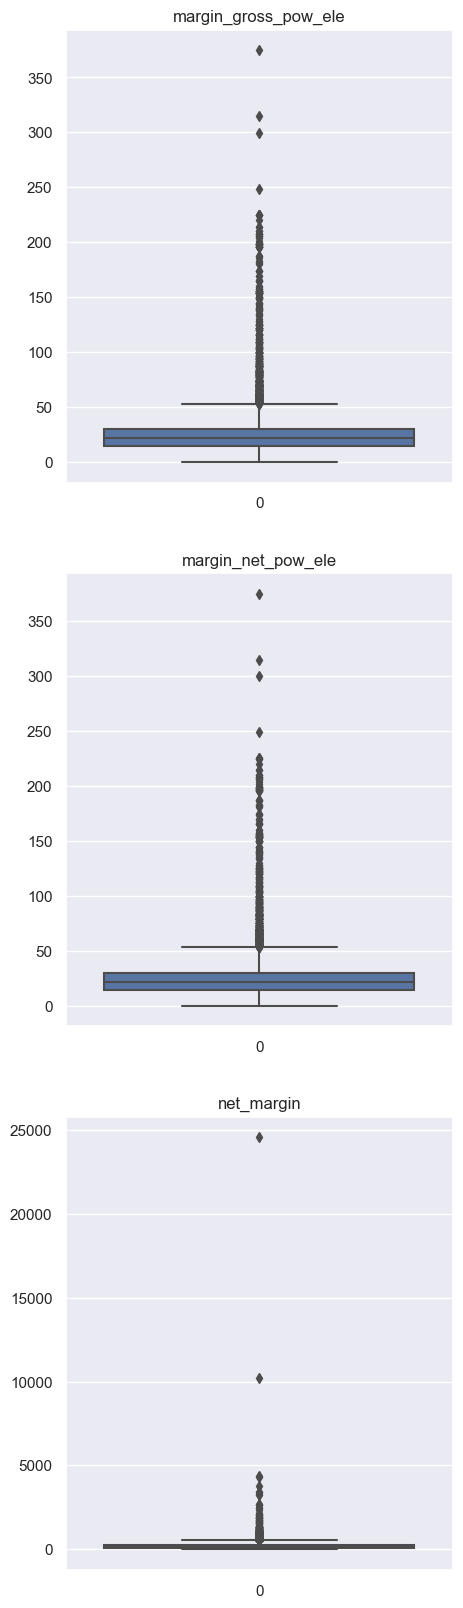

In [36]:
fig, axs = plt.subplots(nrows=3, figsize=(5,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])
# # Remove scientific notation
# axs[0].ticklabel_format(style='plain', axis='x')
# axs[1].ticklabel_format(style='plain', axis='x')
# axs[2].ticklabel_format(style='plain', axis='x')
# plt.show()

# Remove scientific notation from x-axis tick labels
for ax in axs:
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='plain', axis='x')

axs[0].set_title('margin_gross_pow_ele')
axs[1].set_title('margin_net_pow_ele')
axs[2].set_title('net_margin')

plt.show()

We can see some outliers here as well which we will deal with in the next exercise.

### Subscribed power

In [37]:
power = client_df[['id', 'pow_max', 'churn']]

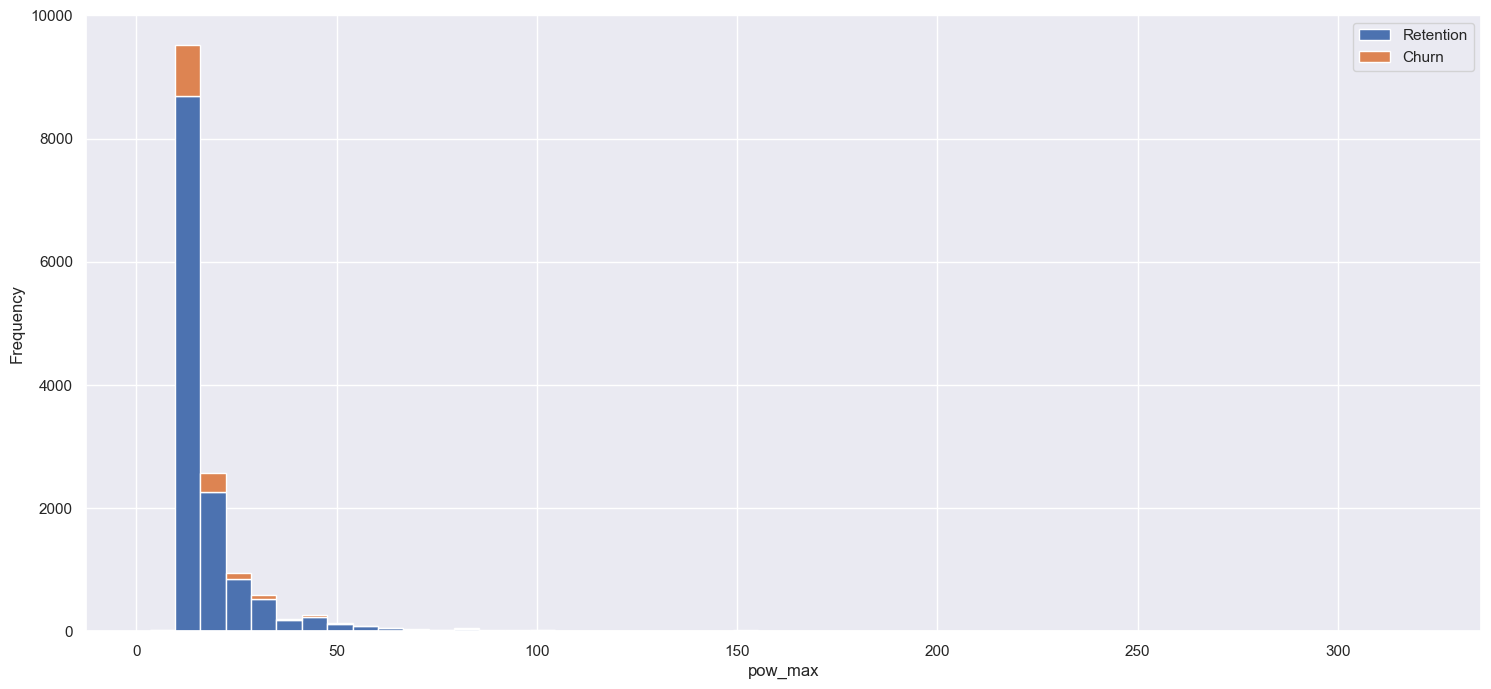

In [38]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 8))
plot_distribution(power, 'pow_max', axs)

### Other columns

In [39]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

In [40]:
products

churn              0       1
nb_prod_act                 
1            10290.0  1141.0
2             2237.0   208.0
3              471.0    52.0
4              135.0    15.0
5               28.0     3.0
6                8.0     NaN
8                4.0     NaN
9               11.0     NaN
10               2.0     NaN
32               1.0     NaN

In [41]:
products_percentage

churn                 0          1
nb_prod_act                       
4             90.000000  10.000000
1             90.018371   9.981629
3             90.057361   9.942639
5             90.322581   9.677419
2             91.492843   8.507157
6            100.000000        NaN
8            100.000000        NaN
9            100.000000        NaN
10           100.000000        NaN
32           100.000000        NaN

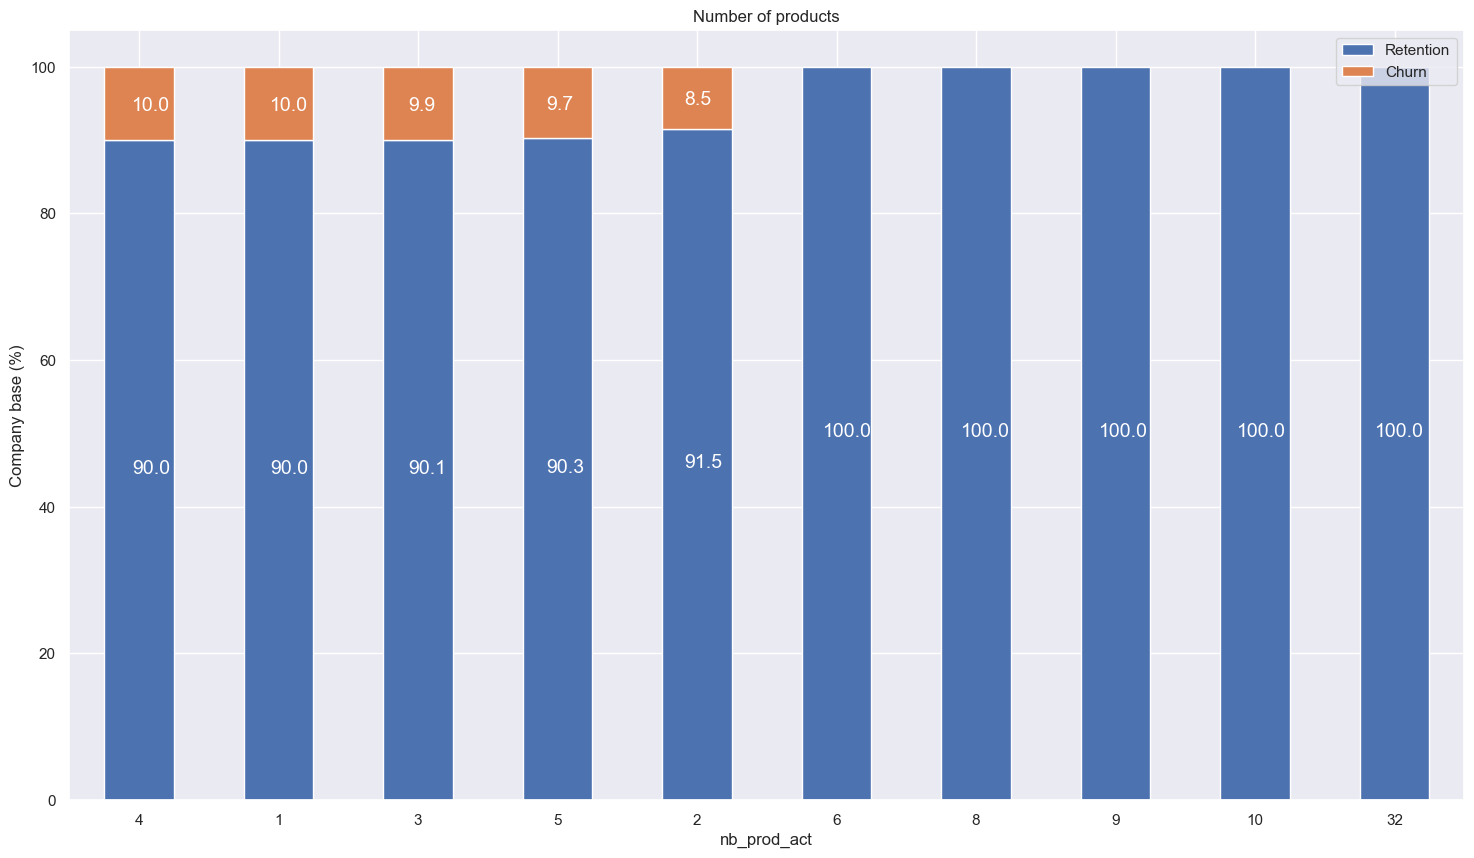

In [42]:
plot_stacked_bars(products_percentage, "Number of products")

In [43]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)

In [44]:
years_antig_percentage

churn                     0          1
num_years_antig                       
1                100.000000        NaN
2                 72.727273  27.272727
3                 86.477600  13.522400
4                 88.146660  11.853340
5                 91.368148   8.631852
6                 92.891592   7.108408
7                 91.748527   8.251473
8                 95.145631   4.854369
9                 98.913043   1.086957
10                95.061728   4.938272
11                93.513514   6.486486
12                90.000000  10.000000
13                92.307692   7.692308

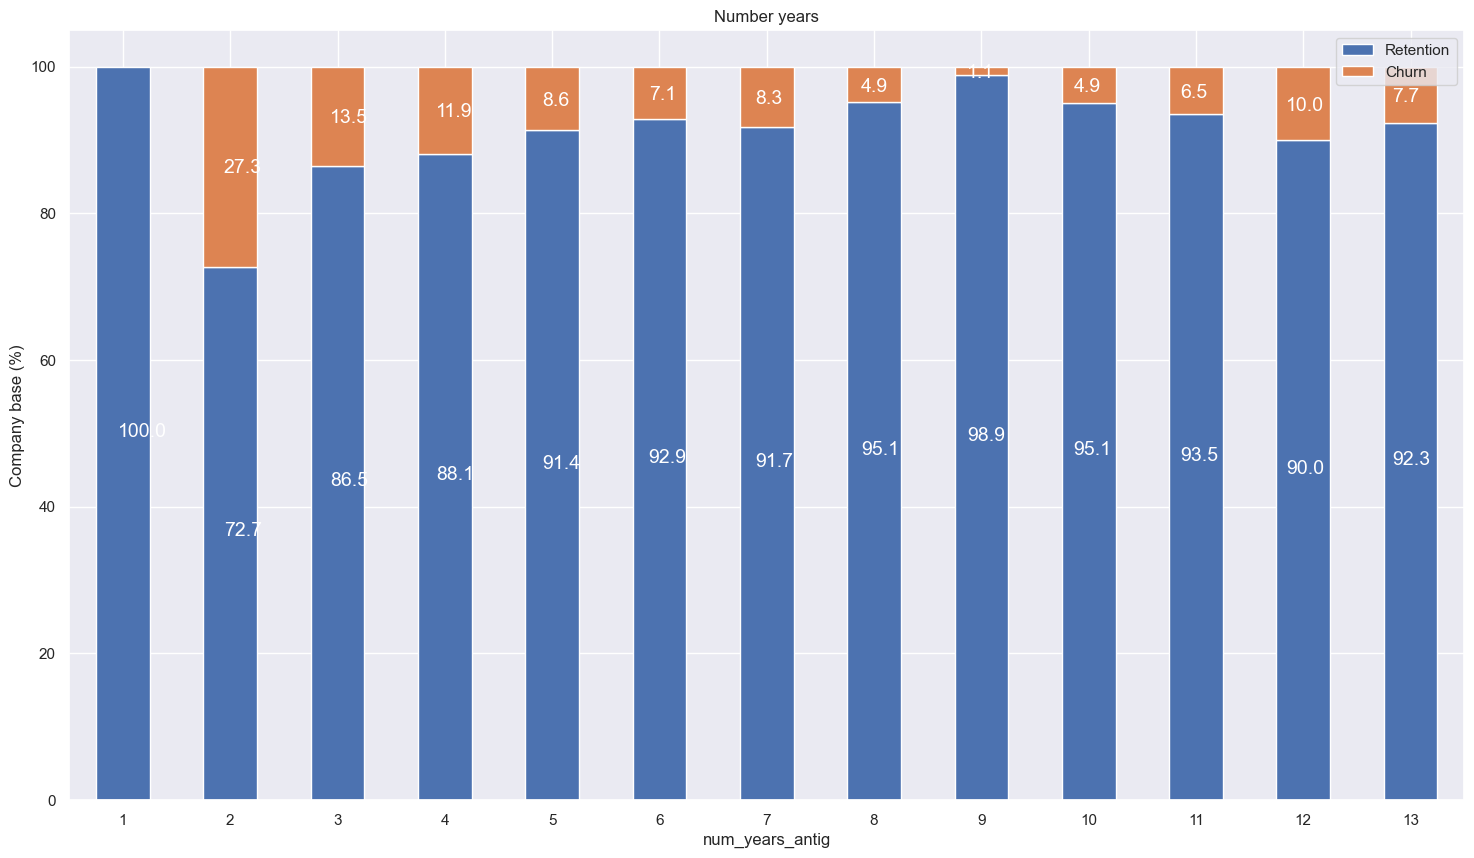

In [45]:
plot_stacked_bars(years_antig_percentage, "Number years")

In [46]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
origin_percentage

churn                                      0          1
origin_up                                              
MISSING                            93.750000   6.250000
ewxeelcelemmiwuafmddpobolfuxioce  100.000000        NaN
kamkkxfxxuwbdslkwifmmcsiusiuosws   93.991616   6.008384
ldkssxwpmemidmecebumciepifcamkci   91.613723   8.386277
lxidpiddsbxsbosboudacockeimpuepw   87.417219  12.582781
usapbepcfoloekilkwsdiboslwaxobdp  100.000000        NaN

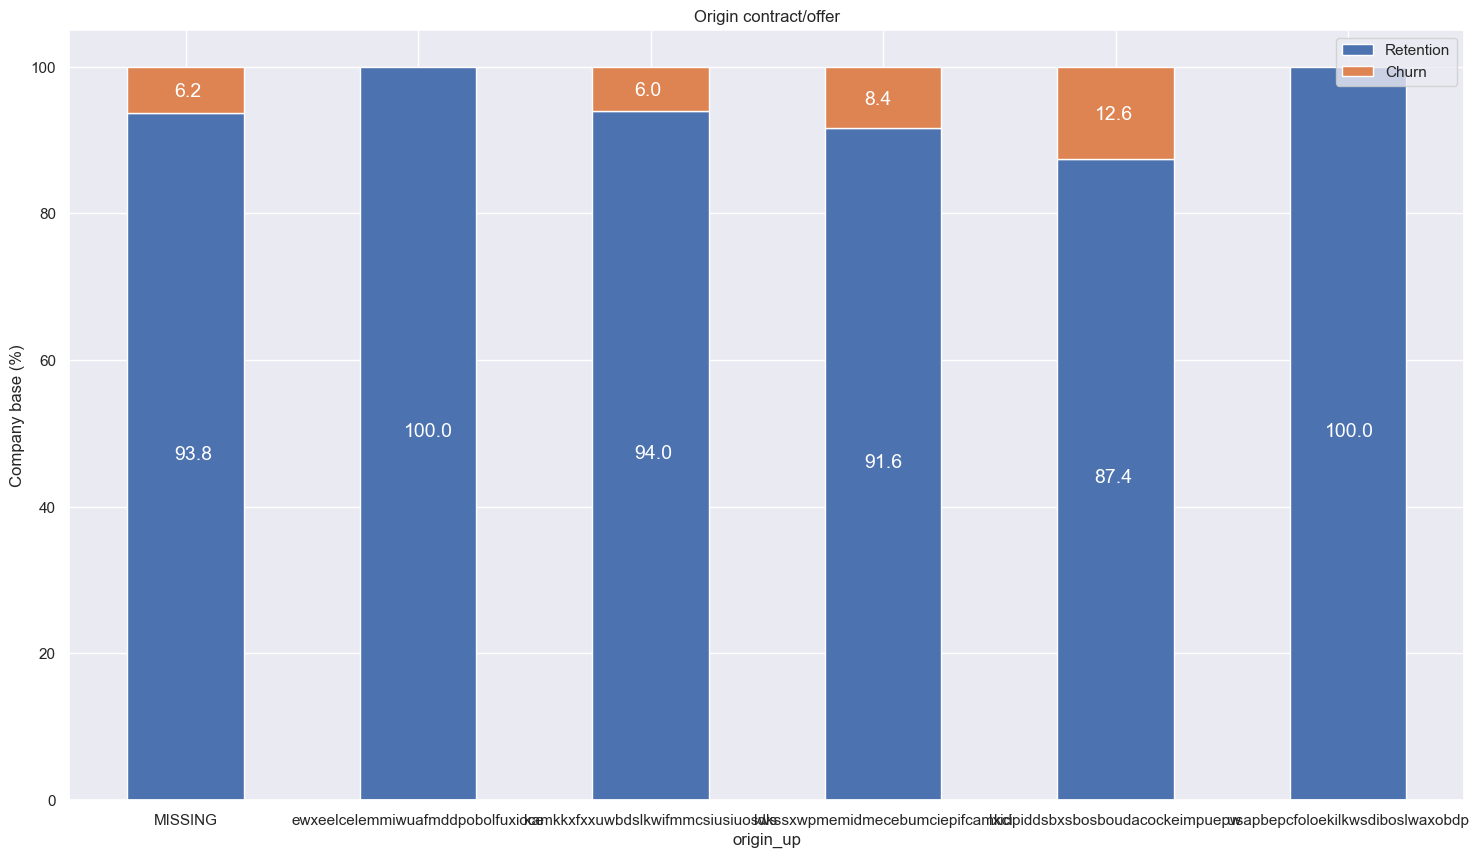

In [47]:
plot_stacked_bars(origin_percentage, "Origin contract/offer")


## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

In [48]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
monthly_price_by_id

id price_date  price_off_peak_var  \
0       0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1       0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2       0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3       0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4       0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   
...                                  ...        ...                 ...   
192997  ffff7fa066f1fb305ae285bb03bf325a 2015-08-01            0.119916   
192998  ffff7fa066f1fb305ae285bb03bf325a 2015-09-01            0.119916   
192999  ffff7fa066f1fb305ae285bb03bf325a 2015-10-01            0.119916   
193000  ffff7fa066f1fb305ae285bb03bf325a 2015-11-01            0.119916   
193001  ffff7fa066f1fb305ae285bb03bf325a 2015-12-01            0.119916   

        price_off_peak_fix  
0                40.565969  
1                40.565969  
2                40.728885  
3                40.728885  
4                40.728885  
...                    ...  
192997           40.728885  
192998           40.728885  
192999           40.728885  
193000           40.728885  
193001           40.728885  

[193002 rows x 4 columns]

In [49]:
# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
jan_prices

id price_date  price_off_peak_var  \
0      0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1      0004351ebdd665e6ee664792efc4fd13 2015-01-01            0.148047   
2      0010bcc39e42b3c2131ed2ce55246e3c 2015-01-01            0.150837   
3      0010ee3855fdea87602a5b7aba8e42de 2015-01-01            0.123086   
4      00114d74e963e47177db89bc70108537 2015-01-01            0.149434   
...                                 ...        ...                 ...   
16091  ffef185810e44254c3a4c6395e6b4d8a 2015-01-01            0.162720   
16092  fffac626da707b1b5ab11e8431a4d0a2 2015-01-01            0.148825   
16093  fffc0cacd305dd51f316424bbb08d1bd 2015-01-01            0.153159   
16094  fffe4f5646aa39c7f97f95ae2679ce64 2015-01-01            0.127566   
16095  ffff7fa066f1fb305ae285bb03bf325a 2015-01-01            0.129444   

       price_off_peak_fix  
0               40.565969  
1               44.266931  
2               44.444710  
3               40.565969  
4               44.266931  
...                   ...  
16091           41.063970  
16092           44.266931  
16093           41.063970  
16094           40.565969  
16095           40.565969  

[16096 rows x 4 columns]

In [50]:
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()
dec_prices

id price_date  price_off_peak_var  \
0      0002203ffbb812588b632b9e628cc38d 2015-12-01            0.119906   
1      0004351ebdd665e6ee664792efc4fd13 2015-12-01            0.143943   
2      0010bcc39e42b3c2131ed2ce55246e3c 2015-12-01            0.201280   
3      0010ee3855fdea87602a5b7aba8e42de 2015-12-01            0.113068   
4      00114d74e963e47177db89bc70108537 2015-12-01            0.145440   
...                                 ...        ...                 ...   
16091  ffef185810e44254c3a4c6395e6b4d8a 2015-12-01            0.112488   
16092  fffac626da707b1b5ab11e8431a4d0a2 2015-12-01            0.145047   
16093  fffc0cacd305dd51f316424bbb08d1bd 2015-12-01            0.151399   
16094  fffe4f5646aa39c7f97f95ae2679ce64 2015-12-01            0.118175   
16095  ffff7fa066f1fb305ae285bb03bf325a 2015-12-01            0.119916   

       price_off_peak_fix  
0               40.728885  
1               44.444710  
2               45.944710  
3               40.728885  
4               44.266930  
...                   ...  
16091           40.728885  
16092           44.444710  
16093           41.228885  
16094           40.728885  
16095           40.728885  

[16096 rows x 4 columns]

In [51]:
# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [52]:
client_df = pd.merge(client_df,diff, on = 'id')
client_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0               9.084737e-04                   2.086294   
1               0.000000e+00                   0.009482   
2               0.000000e+00                   0.000000   
3               0.000000e+00                   0.000000   
4               4.860000e-10                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix  var_6m_price_off_peak  \
0              99.530517                  44.235794               2.086425   
1               0.000000                   0.000000               0.009485   
2               0.000000                   0.000000               0.000004   
3               0.000000                   0.000000               0.000003   
4               0.000000                   0.000000               0.000011   

   var_6m_price_peak var_6m_price_mid_peak  churn  \
0       9.953056e+01          4.423670e+01      1   
1       1.217891e-03          0.000000e+00      0   
2       9.450150e-08          0.000000e+00      0   
3       0.000000e+00          0.000000e+00      0   
4       2.896760e-06          4.860000e-10      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.003767                        0.177779  
2                        -0.004670                        0.177779  
3                        -0.004547                        0.177779  
4                        -0.006192                        0.162916  

[5 rows x 46 columns]

## Average price changes across periods

calculating the average price changes across individual periods, instead of the entire year.

In [53]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()
mean_prices.head()

id  price_off_peak_var  price_peak_var  \
0  0002203ffbb812588b632b9e628cc38d            0.124338        0.103794   
1  0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
3  0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
4  00114d74e963e47177db89bc70108537            0.147926        0.000000   

   price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
0            0.073160           40.701732       24.421038           16.280694  
1            0.000000           44.385450        0.000000            0.000000  
2            0.000000           45.319710        0.000000            0.000000  
3            0.069032           40.647427       24.388455           16.258971  
4            0.000000           44.266930        0.000000            0.000000

In [54]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [55]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
client_df = pd.merge(client_df, mean_prices[columns], on='id')
client_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  var_6m_price_mid_peak  \
0      2015-11-01   2015-06-23               0.00  ...           4.423670e+01   
1      2009-08-21   2015-08-31             189.95  ...           0.000000e+00   
2      2010-04-16   2015-04-17              47.96  ...           0.000000e+00   
3      2010-03-30   2015-03-31             240.04  ...           0.000000e+00   
4      2010-01-13   2015-03-09             445.75  ...           4.860000e-10   

   churn  offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0      1                         0.020057                        3.700961   
1      0                        -0.003767                        0.177779   
2      0                        -0.004670                        0.177779   
3      0                        -0.004547                        0.177779   
4      0                        -0.006192                        0.162916   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                        0.058257                    18.590255   
1                        0.149609                    44.311375   
2                        0.170512                    44.385450   
3                        0.151210                    44.400265   
4                        0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     7.450670                        26.040925  
1                     0.000000                        44.311375  
2                     0.000000                        44.385450  
3                     0.000000                        44.400265  
4                     8.137629                        24.412893  

[5 rows x 52 columns]

This feature may be useful because it adds more granularity to the existing feature. Instead of looking at differences across an entire year, we have now created features that look at mean average price differences across different time periods (`off_peak`, `peak`, `mid_peak`). The dec-jan feature may reveal macro patterns that occur over an entire year, whereas inter-time-period features may reveal patterns on a micro scale between months.

## Max price changes across periods and months

Another way we can enhance the feature  is to look at the maximum change in prices across periods and months.

In [56]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()
mean_prices_by_month.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0        0.103975            0.070232           40.565969       24.339581   
1        0.103975            0.070232           40.565969       24.339581   
2        0.105842            0.073773           40.728885       24.437330   
3        0.105842            0.073773           40.728885       24.437330   
4        0.105842            0.073773           40.728885       24.437330   

   price_mid_peak_fix  
0           16.226389  
1           16.226389  
2           16.291555  
3           16.291555  
4           16.291555

In [57]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [58]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [59]:
max_diff_across_periods_months.head()

id  off_peak_peak_var_max_monthly_diff  \
0  0002203ffbb812588b632b9e628cc38d                            0.022225   
1  0004351ebdd665e6ee664792efc4fd13                            0.148405   
2  0010bcc39e42b3c2131ed2ce55246e3c                            0.205742   
3  0010ee3855fdea87602a5b7aba8e42de                            0.022581   
4  00114d74e963e47177db89bc70108537                            0.149902   

   peak_mid_peak_var_max_monthly_diff  off_peak_mid_peak_var_max_monthly_diff  \
0                            0.033743                                0.055866   
1                            0.000000                                0.148405   
2                            0.000000                                0.205742   
3                            0.031859                                0.054440   
4                            0.000000                                0.149902   

   off_peak_peak_fix_max_monthly_diff  peak_mid_peak_fix_max_monthly_diff  \
0                           16.291555                            8.145775   
1                           44.444710                            0.000000   
2                           45.944710                            0.000000   
3                           16.291555                            8.145775   
4                           44.266931                            0.000000   

   off_peak_mid_peak_fix_max_monthly_diff  
0                               24.437330  
1                               44.444710  
2                               45.944710  
3                               24.437330  
4                               44.266931

In [60]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

client_df = pd.merge(client_df, max_diff_across_periods_months[columns], on='id')
client_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   
2                         0.170512                    44.385450   
3                         0.151210                    44.400265   
4                         0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     7.450670                        26.040925   
1                     0.000000                        44.311375   
2                     0.000000                        44.385450   
3                     0.000000                        44.400265   
4                     8.137629                        24.412893   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.151367                            0.085483   
2                            0.084587                            0.089162   
3                            0.153133                            0.000000   
4                            0.022225                            0.033743   

  off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                               0.146033                           44.266930   
1                               0.151367                           44.444710   
2                               0.172468                           44.444710   
3                               0.153133                           44.444710   
4                               0.055866                           16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            8.145775                                44.26693  
1                            0.000000                                44.44471  
2                            0.000000                                44.44471  
3                            0.000000                                44.44471  
4                            8.145775                                24.43733  

[5 rows x 58 columns]

I thought that calculating the maximum price change between months and time periods would be a good feature to create because I was trying to think from the perspective of a PowerCo client. As a Utilities customer, there is nothing more annoying than sudden price changes between months, and a large increase in prices within a short time span would be an influencing factor in causing me to look at other utilities providers for a better deal. Since we are trying to predict churn for this use case, I thought this would be an interesting feature to include.

## Discount feasibilty
make assumption that 'forecast_discount_energy' is discount given to customer.
Investigating the feasibilty of discount strategy for customers likely to churn

In [61]:
# Create a new DataFrame with relevant columns
discount_churn_df = client_df[['id','forecast_discount_energy', 'churn']].copy()
# Create new column whther discount is given or not
discount_churn_df['discount_given'] = discount_churn_df['forecast_discount_energy'] > 0

discount_churn_df.head()

id  forecast_discount_energy  churn  \
0  24011ae4ebbe3035111d65fa7c15bc57                       0.0      1   
1  d29c2c54acc38ff3c0614d0a653813dd                       0.0      0   
2  764c75f661154dac3a6c254cd082ea7d                       0.0      0   
3  bba03439a292a1e166f80264c16191cb                       0.0      0   
4  149d57cf92fc41cf94415803a877cb4b                       0.0      0   

   discount_given  
0           False  
1           False  
2           False  
3           False  
4           False

In [62]:
# Groupby the discount given
discount = discount_churn_df.groupby([discount_churn_df['discount_given'], discount_churn_df['churn']])['id'].count().unstack(level=1).fillna(0)
discount

churn               0     1
discount_given             
False           12739  1355
True              448    64

In [63]:
# calculate percentage of the churn discount
discount_churn = (discount.div(discount.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
discount_churn

churn                  0         1
discount_given                    
True            87.50000  12.50000
False           90.38598   9.61402

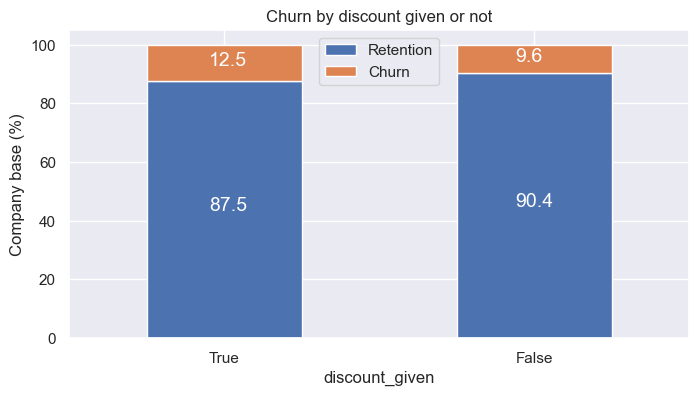

In [64]:
plot_stacked_bars(discount_churn, "Churn by discount given or not", (8, 4), legend_="upper center")

From the above bar chart we can say that discount given is not feasibile.

### Tenure

How long a company has been a client of PowerCo.

In [65]:
client_df['tenure'] = ((client_df['date_end'] - client_df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [66]:
client_df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
2       0.176471
3       0.143874
4       0.127473
13      0.095238
5       0.091999
12      0.083333
7       0.075472
6       0.075407
11      0.059783
8       0.047244
10      0.045455
9       0.012500

We can see that companies who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer. Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values. Perhaps this reveals that getting a customer to over 4 months tenure is actually a large milestone with respect to keeping them as a long term customer. 

This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

### Transforming dates into months

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [67]:
def convert_months(reference_date, client_df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - client_df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [68]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
client_df['months_activ'] = convert_months(reference_date, client_df, 'date_activ')
client_df['months_to_end'] = -convert_months(reference_date, client_df, 'date_end')
client_df['months_modif_prod'] = convert_months(reference_date, client_df, 'date_modif_prod')
client_df['months_renewal'] = convert_months(reference_date, client_df, 'date_renewal')

In [69]:
client_df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   

   peak_mid_peak_var_max_monthly_diff  off_peak_mid_peak_var_max_monthly_diff  \
0                            0.085483                                0.146033   
1                            0.085483                                0.151367   
2                            0.089162                                0.172468   

   off_peak_peak_fix_max_monthly_diff  peak_mid_peak_fix_max_monthly_diff  \
0                            44.26693                            8.145775   
1                            44.44471                            0.000000   
2                            44.44471                            0.000000   

   off_peak_mid_peak_fix_max_monthly_diff  tenure months_activ  months_to_end  \
0                                44.26693       3           30              5   
1                                44.44471       7           74              7   
2                                44.44471       6           67              3   

   months_modif_prod  months_renewal  
0                  1               6  
1                 74               3  
2                 67               8  

[3 rows x 63 columns]

Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power. 

Using intuition, you could assume that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the `months_activ` feature.

As well as this, if we think from the perspective of a client with PowerCo, if you're coming toward the end of your contract with PowerCo your thoughts could go a few ways. You could be looking for better deals for when your contract ends, or you might want to see out your contract and sign another one. One the other hand if you've only just joined, you may have a period where you're allowed to leave if you're not satisfied. Furthermore, if you're in the middle of your contract, their may be charges if you wanted to leave, deterring clients from churning mid-way through their agreement. So, I think `months_to_end` will be an interesting feature because it may reveal patterns and behaviours about timing of churn.

My belief is that if a client has made recent updates to their contract, they are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. I believe this to be a positive sign, they are an engaged customer, and so I believe `months_modif_prod` will be an interesting feature to include because it shows the degree of how 'engaged' a client is with PowerCo.

Finally the number of months since a client last renewed a contract I believe will be an interesting feature because once again, it shows the degree to which that client is engaged. It also goes a step further than just engagement, it shows a level of commitment if a client renews their contract. For this reason, I believe `months_renewal` will be a good feature to include.

In [70]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

client_df = client_df.drop(columns=remove)
client_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_max_monthly_diff  \
0                        0.114481  ...                            0.085483   
1                        0.145711  ...                            0.085483   
2                        0.165794  ...                            0.089162   
3                        0.146694  ...                            0.000000   
4                        0.116900  ...                            0.033743   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                          44.266930   
1                                0.151367                          44.444710   
2                                0.172468                          44.444710   
3                                0.153133                          44.444710   
4                                0.055866                          16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                            8.145775                                44.26693   
1                            0.000000                                44.44471   
2                            0.000000                                44.44471   
3                            0.000000                                44.44471   
4                            8.145775                                24.43733   

   tenure  months_activ  months_to_end  months_modif_prod months_renewal  
0       3            30              5                  1              6  
1       7            74              7                 74              3  
2       6            67              3                 67              8  
3       6            67              2                 67              8  
4       6            70              2                 70              9  

[5 rows x 59 columns]

### Transforming Boolean data

#### has_gas

We simply want to transform this column from being categorical to being a binary flag

In [71]:
client_df['has_gas'] = client_df['has_gas'].replace(['t', 'f'], [1, 0])
client_df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081856

If a customer also buys gas from PowerCo, it shows that they have multiple products and are a loyal customer to the brand. Hence, it is no surprise that customers who do not buy gas are almost 2% more likely to churn than customers who also buy gas from PowerCo. Hence, this is a useful feature.

### Transforming categorical data

A predictive model cannot accept categorical or `string` values, hence as a data scientist you need to encode categorical features into numerical representations in the most compact and discriminative way possible.

The simplest method is to map each category to an integer (label encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present `0 < 1 < 2 < 3 ...`

Another way to encode categorical features is to use `dummy variables` AKA `one hot encoding`. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

#### channel_sales

In [72]:
# Transform into categorical type
client_df['channel_sales'] = client_df['channel_sales'].astype('category')

# Let's see how many categories are within this column
client_df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

We have 8 categories, so we will create 8 dummy variables from this column. However, as you can see the last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences respectively. Considering that our dataset has about 14000 rows, this means that these dummy variables will be almost entirely 0 and so will not add much predictive power to the model at all (since they're almost entirely a constant value and provide very little).

For this reason, we will drop these 3 dummy variables.

In [73]:
client_df = pd.get_dummies(client_df, columns=['channel_sales'], prefix='channel_sales')
client_df = client_df.drop(columns=['channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa'])
client_df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  tenure  months_activ  months_to_end  \
0                    0.098142  ...       3            30              5   
1                    0.000000  ...       7            74              7   
2                    0.087899  ...       6            67              3   
3                    0.000000  ...       6            67              2   
4                    0.100015  ...       6            70              2   

   months_modif_prod  months_renewal  channel_sales_MISSING  \
0                  1               6                  False   
1                 74               3                   True   
2                 67               8                  False   
3                 67               8                  False   
4                 70               9                   True   

   channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                            True   
1                                           False   
2                                            True   
3                                           False   
4                                           False   

  channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                          False   
1                                          False   
2                                          False   
3                                           True   
4                                          False   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  
0                                           False  
1                                           False  
2                                           False  
3                                           False  
4                                           False  

[5 rows x 63 columns]

#### origin_up

In [74]:
# Transform into categorical type
client_df['origin_up'] = client_df['origin_up'].astype('category')

# Let's see how many categories are within this column
client_df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

Similar to `channel_sales` the last 3 categories in the output above show very low frequency, so we will remove these from the features after creating dummy variables.

In [75]:
client_df = pd.get_dummies(client_df, columns=['origin_up'], prefix='origin_up')
client_df = client_df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
client_df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  1               6   
1                    0.000000  ...                 74               3   
2                    0.087899  ...                 67               8   
3                    0.000000  ...                 67               8   
4                    0.100015  ...                 70               9   

   channel_sales_MISSING  channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                  False                                           False   
1                   True                                           False   
2                  False                                           False   
3                  False                                           False   
4                   True                                           False   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                            True   
1                                           False   
2                                            True   
3                                           False   
4                                           False   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                           False   
1                                           False   
2                                           False   
3                                            True   
4                                           False   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                                       False  

[5 rows x 65 columns]

### Transforming numerical data

In the previous exercise we saw that some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called `parametric` models, and they typically assume that all variables are both independent and normally distributed. 

Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

There are many ways that you can treat skewed variables. You can apply transformations such as:
- Square root
- Cubic root
- Logarithm

to a continuous numeric column and you will notice the distribution changes. For this use case we will use the 'Logarithm' transformation for the positively skewed features. 

<b>Note:</b> We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [76]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

client_df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

We can see that the standard deviation for most of these features is quite high.

In [77]:
# Apply log10 transformation
client_df["cons_12m"] = np.log10(client_df["cons_12m"] + 1)
client_df["cons_gas_12m"] = np.log10(client_df["cons_gas_12m"] + 1)
client_df["cons_last_month"] = np.log10(client_df["cons_last_month"] + 1)
client_df["forecast_cons_12m"] = np.log10(client_df["forecast_cons_12m"] + 1)
client_df["forecast_cons_year"] = np.log10(client_df["forecast_cons_year"] + 1)
client_df["forecast_meter_rent_12m"] = np.log10(client_df["forecast_meter_rent_12m"] + 1)
client_df["imp_cons"] = np.log10(client_df["imp_cons"] + 1)

In [78]:
client_df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean             1.784610                  0.966726                 1.517203   
std              1.584986                  5.108289                 0.571481   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296555   
75%              3.242231                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now.

Let's quickly check the distributions of some of these features too.

C:\Users\PAVI\AppData\Local\Temp\ipykernel_19256\4203890716.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((client_df["cons_12m"].dropna()), ax=axs[0])
C:\Users\PAVI\AppData\Local\Temp\ipykernel_19256\4203890716.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((client_df[client_df["has_g

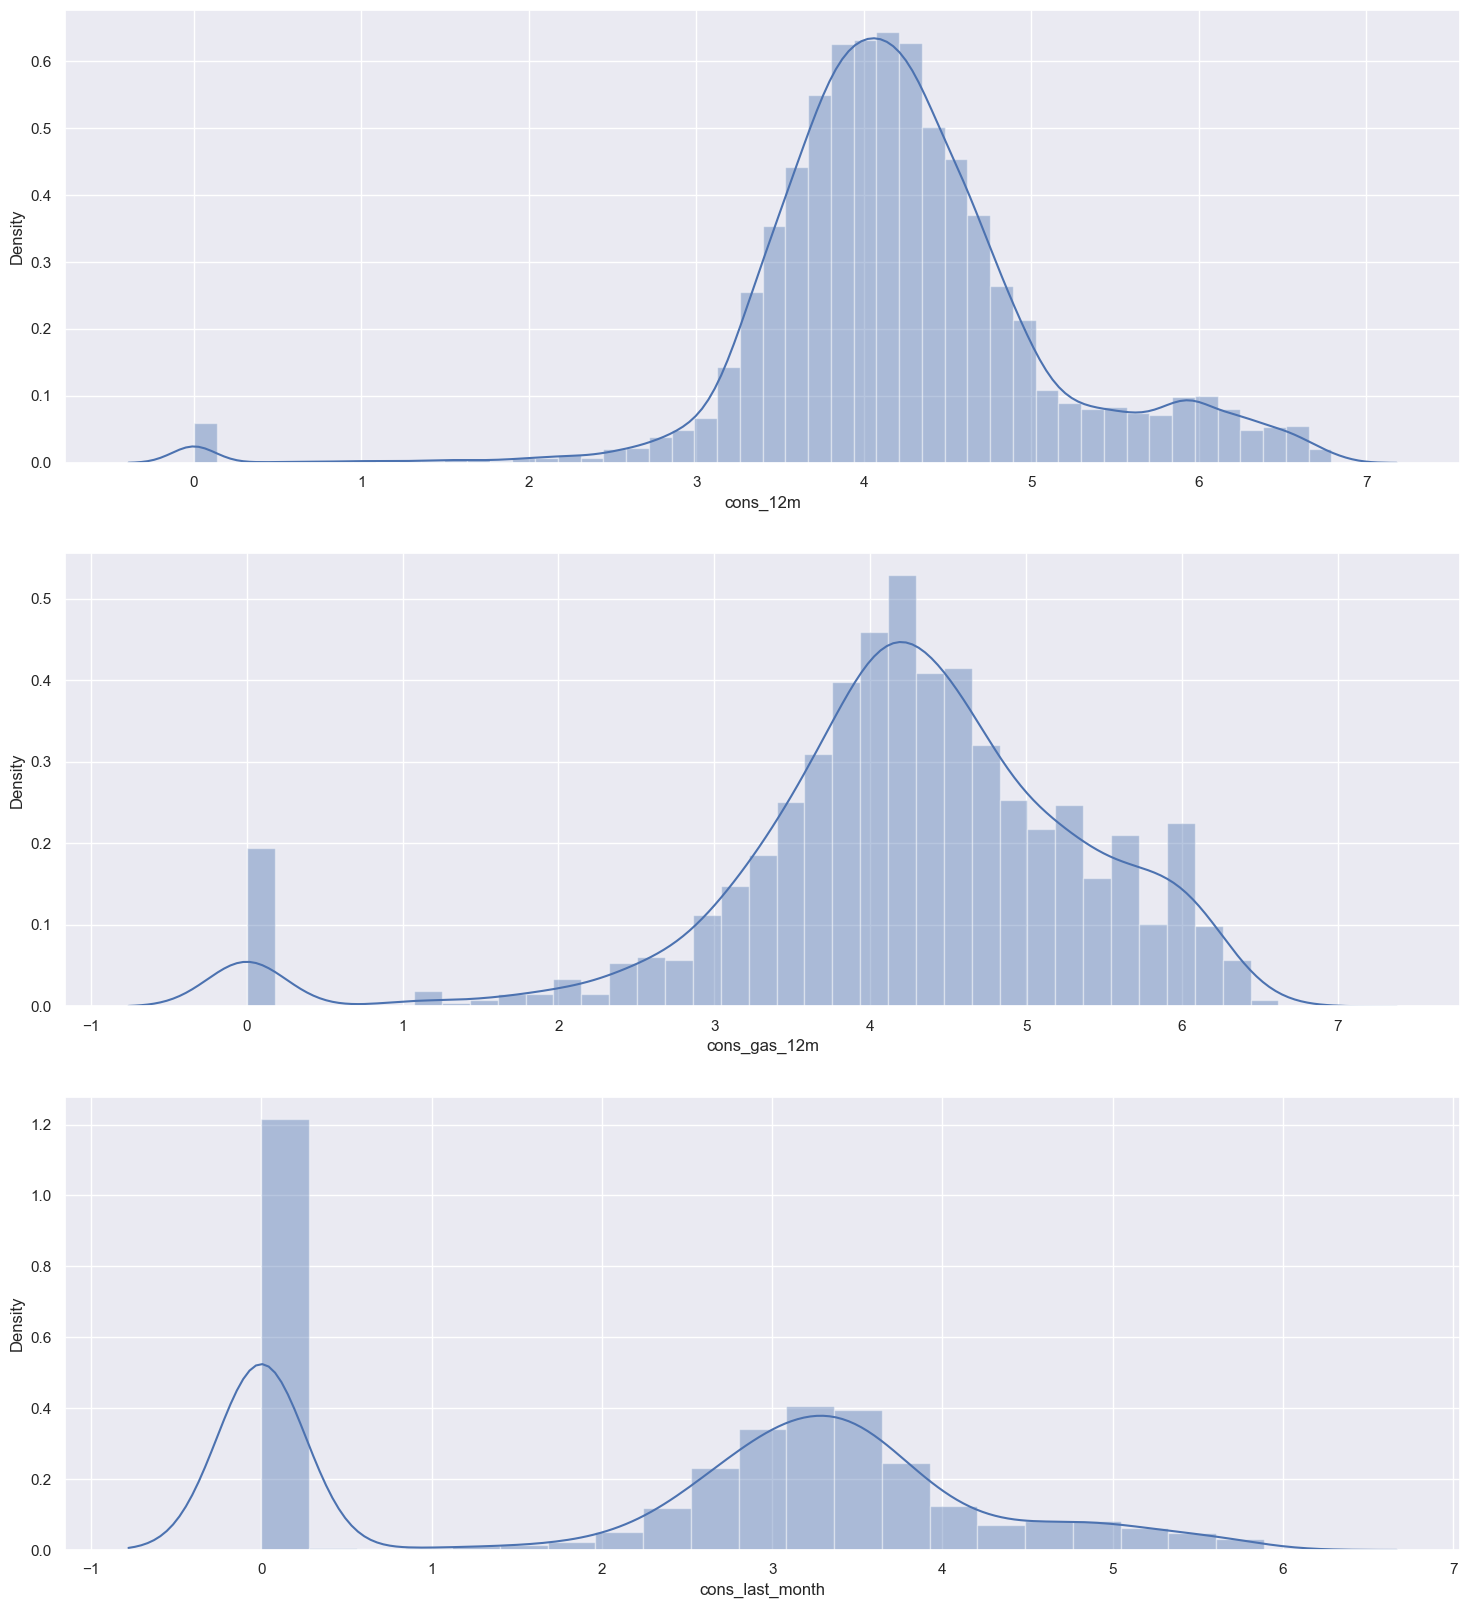

In [79]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((client_df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((client_df[client_df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((client_df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

### Correlations

In [80]:
# Exclude 'id' column from correlation calculation
correlation = client_df.drop('id', axis=1).corr()


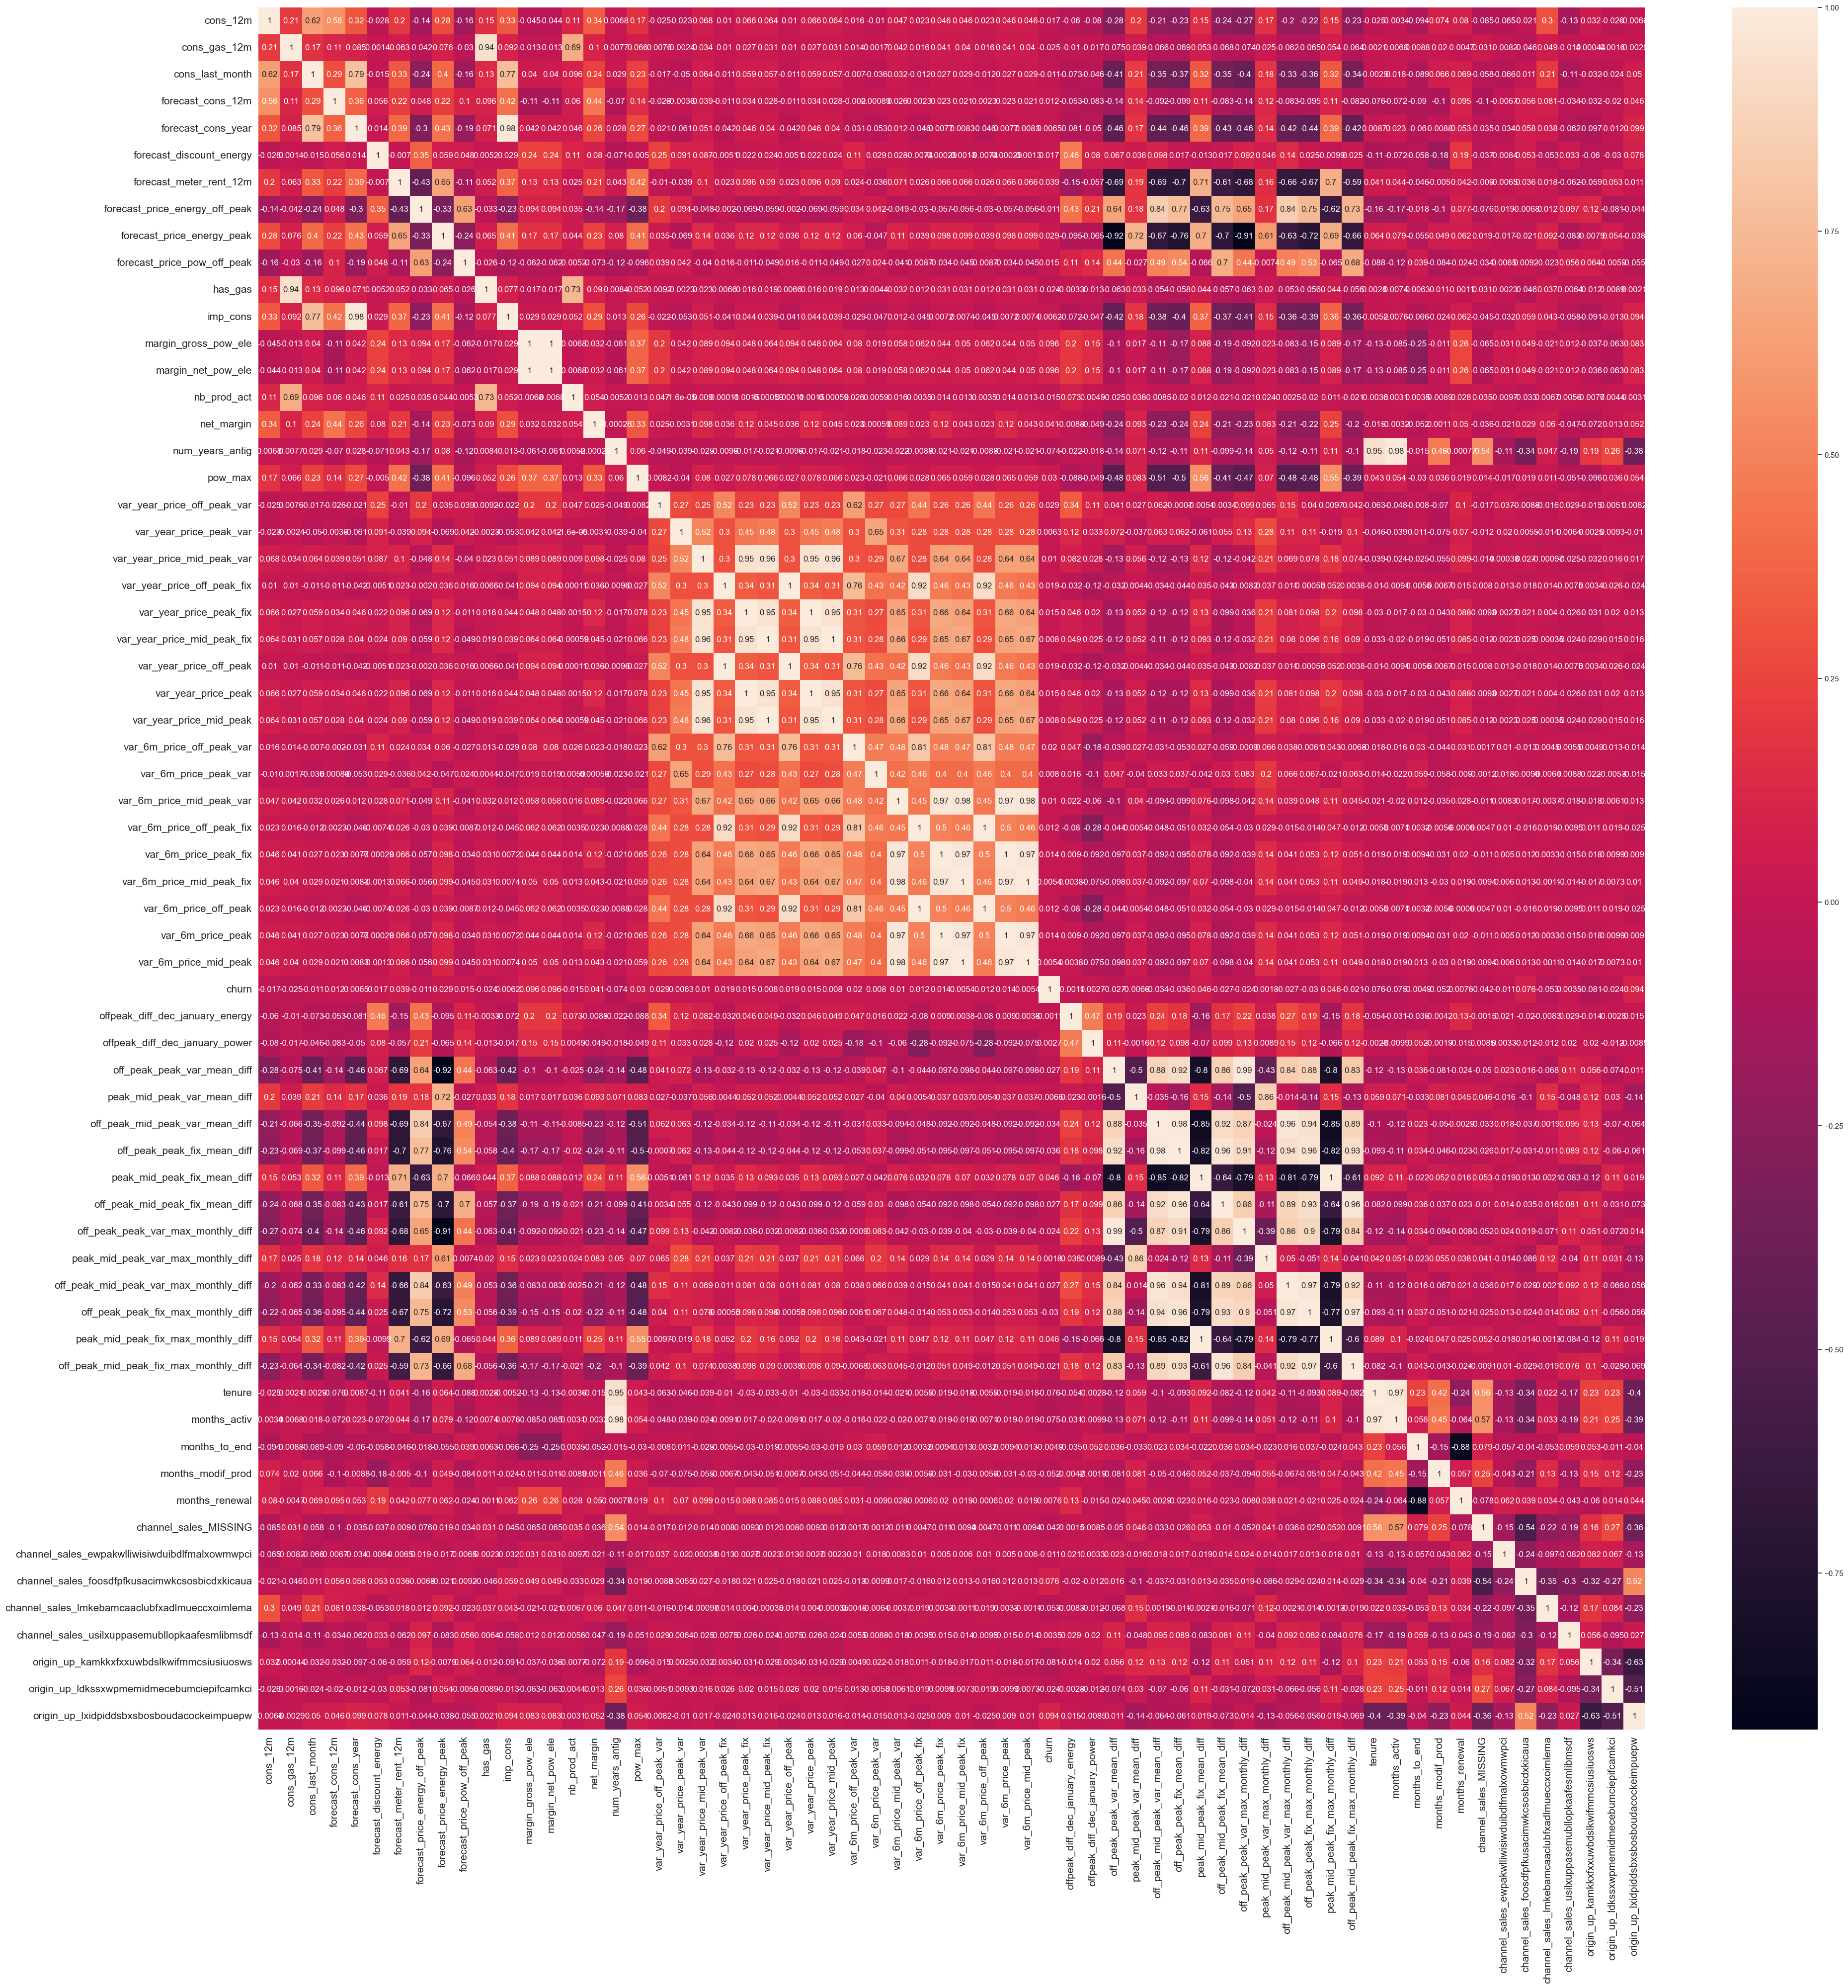

In [81]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [82]:
target_correlations = correlation['churn']
target_correlations

cons_12m                                         -0.016693
cons_gas_12m                                     -0.025134
cons_last_month                                  -0.011463
forecast_cons_12m                                 0.012169
forecast_cons_year                                0.006543
                                                    ...   
channel_sales_lmkebamcaaclubfxadlmueccxoimlema   -0.052946
channel_sales_usilxuppasemubllopkaafesmlibmsdf    0.003496
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws       -0.080766
origin_up_ldkssxwpmemidmecebumciepifcamkci       -0.023519
origin_up_lxidpiddsbxsbosboudacockeimpuepw        0.094131
Name: churn, Length: 64, dtype: float64

Two variables which exhibit a high correlation with other independent features.

In [83]:
client_df = client_df.drop(columns=['num_years_antig', 'forecast_cons_year'])
client_df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           0.000000                       0.0                 0.444045   
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal  \
0                    40.606701  ...                  1               6   
1                    44.311378  ...                 74               3   
2                    44.311378  ...                 67               8   
3                    44.311378  ...                 67               8   
4                    40.606701  ...                 70               9   

   channel_sales_MISSING  channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                  False                                           False   
1                   True                                           False   
2                  False                                           False   
3                  False                                           False   
4                   True                                           False   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                            True   
1                                           False   
2                                            True   
3                                           False   
4                                           False   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                           False   
1                                           False   
2                                           False   
3                                            True   
4                                           False   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                    

### Change Boolean data types into integers

In [84]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 63 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              14606 non-null  object 
 1   cons_12m                                        14606 non-null  float64
 2   cons_gas_12m                                    14606 non-null  float64
 3   cons_last_month                                 14606 non-null  float64
 4   forecast_cons_12m                               14606 non-null  float64
 5   forecast_discount_energy                        14606 non-null  float64
 6   forecast_meter_rent_12m                         14606 non-null  float64
 7   forecast_price_energy_off_peak                  14606 non-null  float64
 8   forecast_price_energy_peak                      14606 non-null  float64
 9   forecast_price_pow_off_peak            

In [85]:
client_df[['tenure', 'months_activ',
       'months_to_end', 'months_modif_prod', 'months_renewal',
       'channel_sales_MISSING',
       'channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_sales_foosdfpfkusacimwkcsosbicdxkicaua',
       'channel_sales_lmkebamcaaclubfxadlmueccxoimlema',
       'channel_sales_usilxuppasemubllopkaafesmlibmsdf',
       'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'origin_up_ldkssxwpmemidmecebumciepifcamkci',
       'origin_up_lxidpiddsbxsbosboudacockeimpuepw']] = client_df[['tenure', 'months_activ',
                                                           'months_to_end', 'months_modif_prod', 'months_renewal',
                                                            'channel_sales_MISSING',
                                                            'channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci',
                                                           'channel_sales_foosdfpfkusacimwkcsosbicdxkicaua',
                                                            'channel_sales_lmkebamcaaclubfxadlmueccxoimlema',
                                                           'channel_sales_usilxuppasemubllopkaafesmlibmsdf',
                                                           'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
                                                            'origin_up_ldkssxwpmemidmecebumciepifcamkci',
                                                           'origin_up_lxidpiddsbxsbosboudacockeimpuepw']].astype('int64')

In [86]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 63 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              14606 non-null  object 
 1   cons_12m                                        14606 non-null  float64
 2   cons_gas_12m                                    14606 non-null  float64
 3   cons_last_month                                 14606 non-null  float64
 4   forecast_cons_12m                               14606 non-null  float64
 5   forecast_discount_energy                        14606 non-null  float64
 6   forecast_meter_rent_12m                         14606 non-null  float64
 7   forecast_price_energy_off_peak                  14606 non-null  float64
 8   forecast_price_energy_peak                      14606 non-null  float64
 9   forecast_price_pow_off_peak            

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. 

In [87]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [88]:
# Make a copy of our data
train_df = client_df.copy()

# Separate target variable from independent variables
y = train_df['churn']
X = train_df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10224, 61)
(10224,)
(4382, 61)
(4382,)


In [90]:
model = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features='sqrt')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# EVALUATION

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(y_test.value_counts())

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

churn
0    3942
1     440
Name: count, dtype: int64
True positives: 15
False positives: 2
True negatives: 3940
False negatives: 425

Accuracy: 0.902555910543131
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3942
           1       0.88      0.03      0.07       440

    accuracy                           0.90      4382
   macro avg       0.89      0.52      0.51      4382
weighted avg       0.90      0.90      0.86      4382



In [91]:
client_df['churn'].value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

Looking at these results there are a few things to point out:

<b>Note:</b> If you are running this notebook yourself, you may get slightly different answers!

- Within the test set about 10% of the rows are churners (churn = 1).
- Looking at the true negatives, we have 3940 out of 3942. This means that out of all the negative cases (churn = 0), we predicted 3940 as negative (hence the name True negative). This is great!
- Looking at the false negatives, this is where we have predicted a client to not churn (churn = 0) when in fact they did churn (churn = 1). This number is quite high at 425, we want to get the false negatives to as close to 0 as we can, so this would need to be addressed when improving the model.
- Looking at false positives, this is where we have predicted a client to churn when they actually didnt churn. For this value we can see there are 2 cases, which is great!
- With the true positives, we can see that in total we have 366 clients that churned in the test dataset. However, we are only able to correctly identify 15 of those 440, which is very poor.
- Looking at the accuracy score, this is very misleading! Hence the use of precision and recall is important. The accuracy score is high, but it does not tell us the whole story.
- Looking at the precision score, this shows us a score of 0.89 which is not bad, but could be improved.
- However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!

So overall, we're able to very accurately identify clients that do not churn, but we are not able to predict cases where clients do churn! What we are seeing is that a high % of clients are being identified as not churning when they should be identified as churning. This in turn tells me that the current set of features are not discriminative enough to clearly distinguish between churners and non-churners. 

A data scientist at this point would go back to feature engineering to try and create more predictive features.



### Class Imbalance
As we see there is class imbalance, we will try to adjust the weights if it will givve a better recall score

you can use the compute_class_weight function from scikit-learn to automatically compute class weights based on the distribution of classes in your dataset:

In [92]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Create a dictionary mapping class indices to weights
class_weight_dict = dict(enumerate(class_weights))

# Initialize the RandomForestClassifier with computed class weights

model = RandomForestClassifier(class_weight=class_weight_dict,n_estimators=200,criterion = 'gini', max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features='sqrt')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

# EVALUATION

tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
print(y_test.value_counts(),'\n')

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

churn
0    3942
1     440
Name: count, dtype: int64 

True positives: 31
False positives: 16
True negatives: 3926
False negatives: 409

Accuracy: 0.902555910543131
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3942
           1       0.88      0.03      0.07       440

    accuracy                           0.90      4382
   macro avg       0.89      0.52      0.51      4382
weighted avg       0.90      0.90      0.86      4382



Still the model dosen,t improve.

### Model understanding

A simple way of understanding the results of a model is to look at feature importances. Feature importances indicate the importance of a feature within the predictive model, there are several ways to calculate feature importance, but with the Random Forest classifier, we're able to extract feature importances using the built-in method on the trained model. In the Random Forest case, the feature importance represents the number of times each feature is used for splitting across all trees.

In [93]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

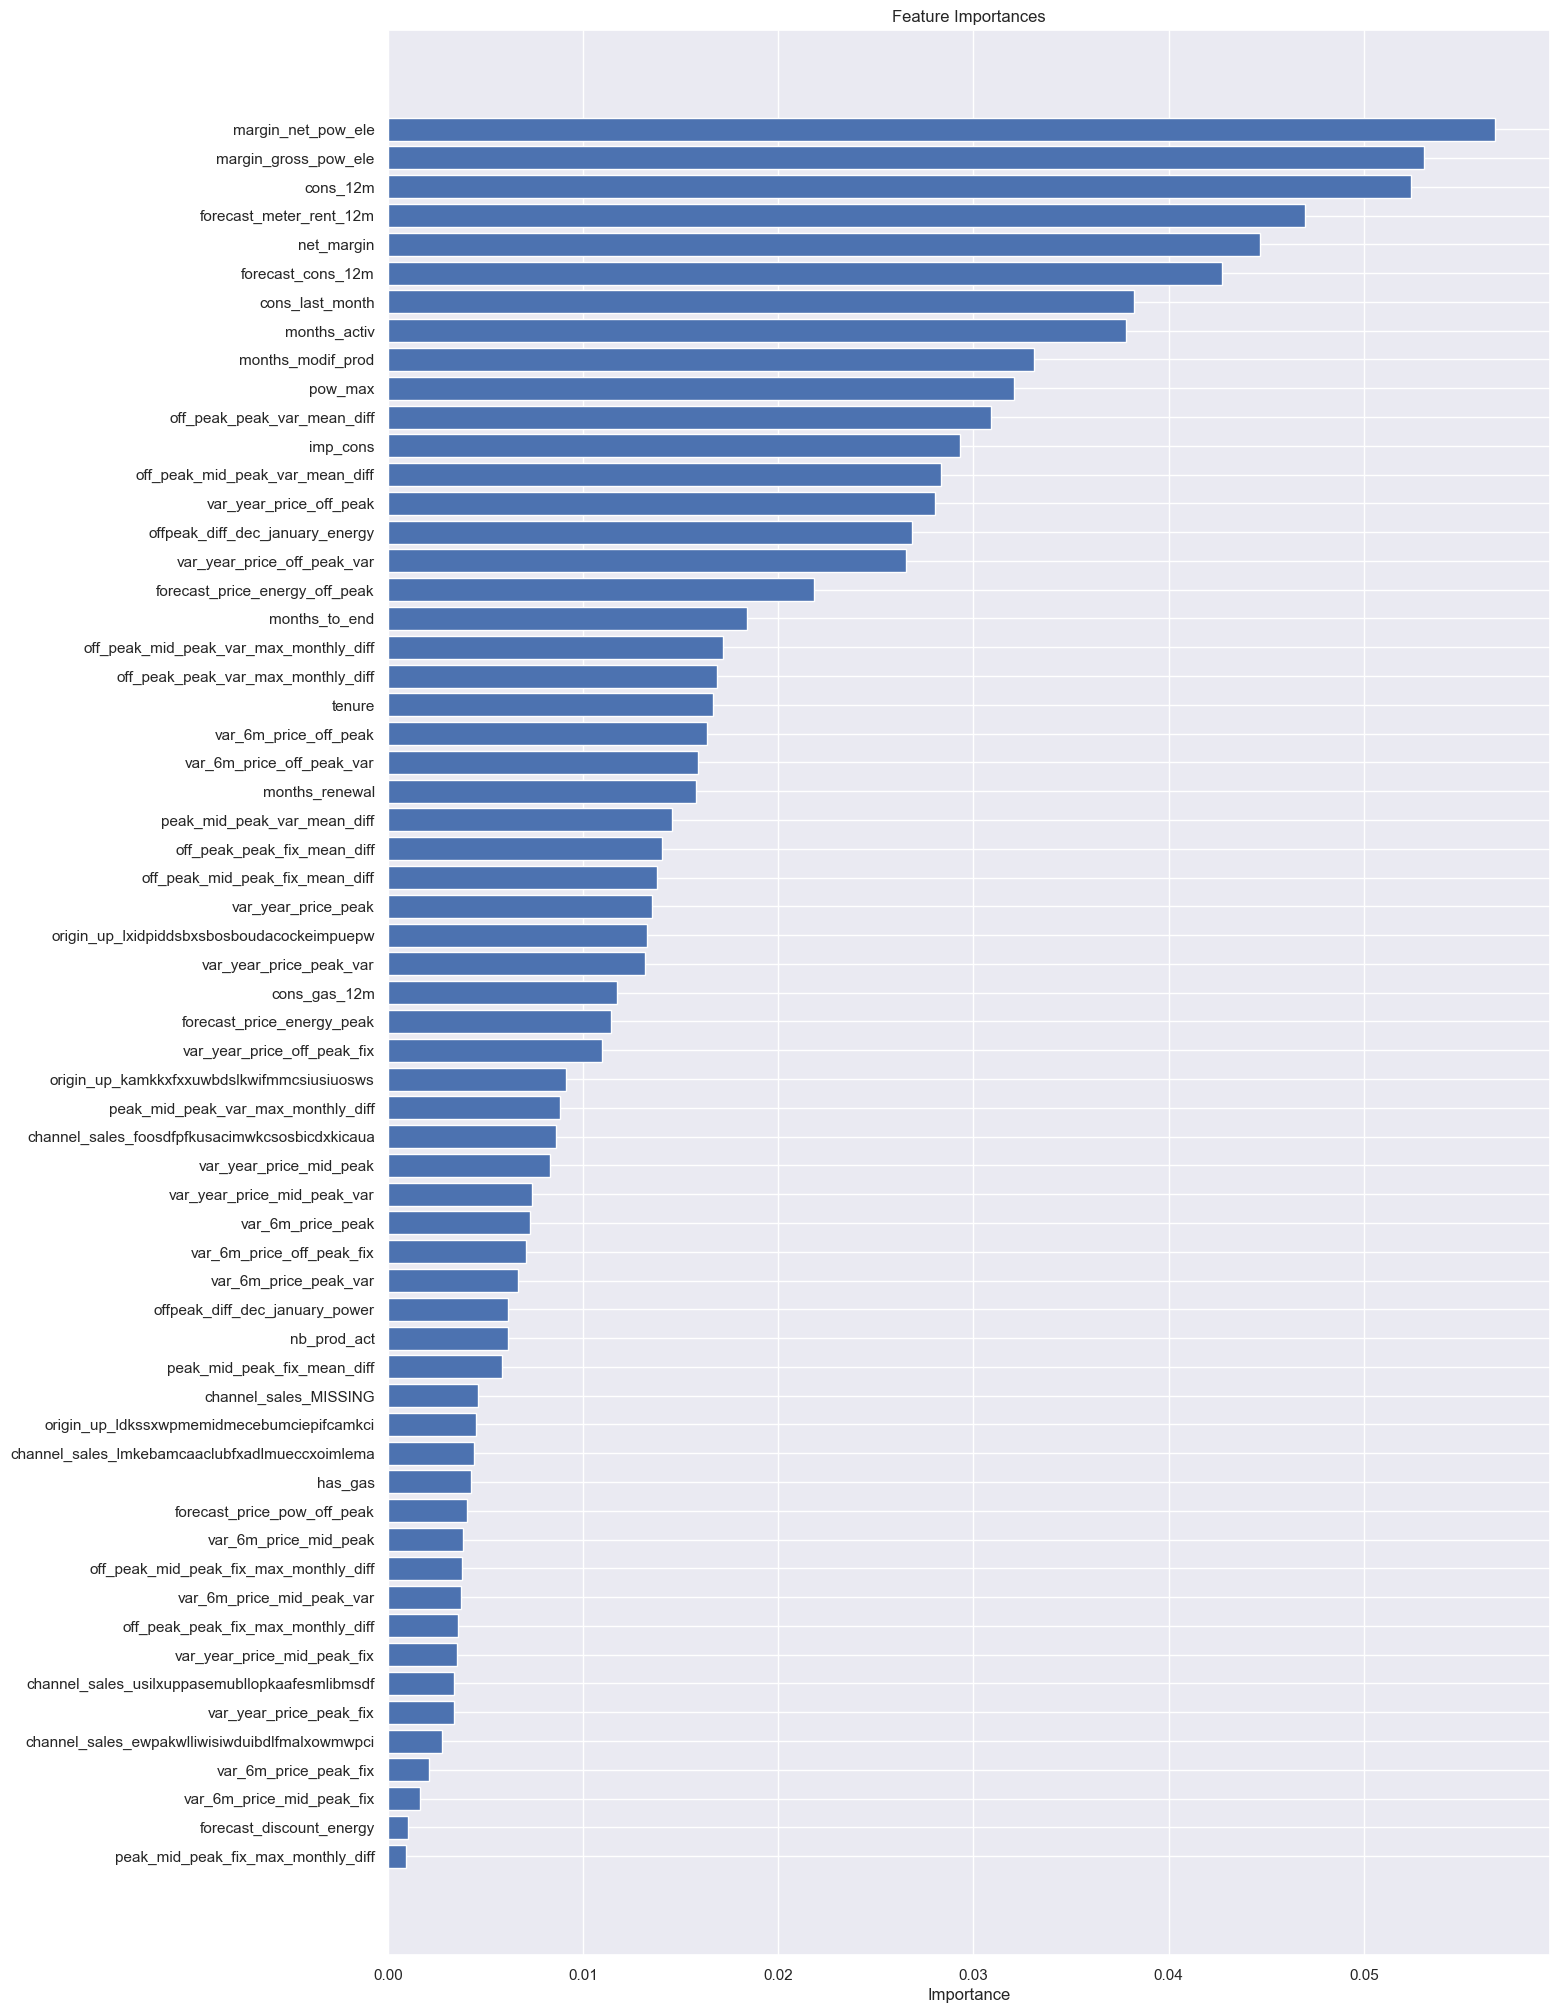

In [94]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Net margin and consumption over 12 months is a top driver for churn in this model
- Margin on power subscription also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- Our price sensitivity features are scattered around but are not the main driver for a customer churning

The last observation is important because this relates back to our original hypothesis:

    > Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [95]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [96]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [97]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')